Vasmos a cargar el dataset de AirBnB descargado de [aquí](https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=Madrid&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=16,41.38377,2.15774&basemap=jawg.streets)

![](descargar.png)

In [2]:
airbnb<-read.csv('..//data/airbnb-listings.csv',sep = ';', stringsAsFactors = T)
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)
head(airbnb)

ID,Listing.Url,Scrape.ID,Last.Scraped,Name,Summary,Space,Description,Experiences.Offered,Neighborhood.Overview,...,Review.Scores.Communication,Review.Scores.Location,Review.Scores.Value,License,Jurisdiction.Names,Cancellation.Policy,Calculated.host.listings.count,Reviews.per.Month,Geolocation,Features
14712301,https://www.airbnb.com/rooms/14712301,2.017030e+13,2017-03-04,Cozy Studio between Earls Court and Gloucester Rd,"Located 1 minute away from Earls Court. It is a commercial street full of restaurants, supermarkets, the tube station, gym, hotels and everything you might need. It is a cozy studio, in a perfect location and good price even if it is located in one of the most expensive areas of London (Kensington and Chelsea Borough). It has a double bed a big desk an induction kitchen and a shower. There are cupboards to store all your needs.",,"Located 1 minute away from Earls Court. It is a commercial street full of restaurants, supermarkets, the tube station, gym, hotels and everything you might need. It is a cozy studio, in a perfect location and good price even if it is located in one of the most expensive areas of London (Kensington and Chelsea Borough). It has a double bed a big desk an induction kitchen and a shower. There are cupboards to store all your needs.",none,,...,9,9,10,,,strict,1,0.34,"51.4924740202,-0.188628400994","Host Has Profile Pic,Host Identity Verified"
12884849,https://www.airbnb.com/rooms/12884849,2.017030e+13,2017-03-05,Five bedroom house in Barnes,"Lovely and spacious Edwardian house located on beautiful street in Barnes, between the village (10 minutes walk) and Hammersmith station (15 minutes walk / 5 minutes by bus). Can accommodate up to 8 adults and 2 young children.","The house is spacious with approx 225 sq. of living space. The ground floor has a TV / living room, where the sofa can be used as a single bed if required. There is also a separate dining / reception area adjacent to the kitchen, as well as a conservatory with a smaller dining table and plenty of toys (which will be removed if you come without kids!). Both the kitchen and the conservatory have direct access on to the garden. On the first floor, the master bedroom is located, as well as two smaller bedrooms and a spacious bathroom. The childrens' bedrooms have a crib and a cot bed respectively, however we can prepare one of them with a king size sofa bed if requested, to accommodate older children or additional adults. On the top floor, there are two additional and spacious bedrooms as well as shared bathroom. All bedrooms including the children's bedrooms have plenty of wardrobe space. House is basic but clean and fully functional.","Lovely and spacious Edwardian house located on beautiful street in Barnes, between the village (10 minutes walk) and Hammersmith station (15 minutes walk / 5 minutes by bus). Can accommodate up to 8 adults and 2 young children. The house is spacious with approx 225 sq. of living space. The ground floor has a TV / living room, where the sofa can be used as a single bed if required. There is also a separate dining / reception area adjacent to the kitchen, as well as a conservatory with a smaller dining table and plenty of toys (which will be removed if you come without kids!). Both the kitchen and the conservatory have direct access on to the garden. On the first floor, the master bedroom is located, as well as two smaller bedrooms and a spacious bathroom. The childrens' bedrooms have a crib and a cot bed respectively, however we can prepare one of them with a king size sofa bed if requested, to accommodate older children or additional adults. On the top floor, there are two additional",none,Quiet residential street,...,10,10,9,,,moderate,2,0.76,"51.4820046166,-0.23927746504","Host Has Profile Pic,Is Location Exact"
17524980,https://www.airbnb.com/rooms/17524980,2.017030e+13,2017-03-05,"Modern & Bright, Central Soho, 1 Bedroom Apartment","A nice compact one bedroom apartment that has been recently 

Vamos a quedarnos con las columnas de mayor interés:

'City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude'

In [3]:
airbnb_new <- airbnb[,c('City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude')]
head(airbnb_new)

City,Room.Type,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
London,Entire home/apt,,1,1.0,1,1,50,NA,1,20,90,51.49247,-0.1886284
London,Entire home/apt,LB of Richmond upon Thames,8,2.5,5,5,175,NA,6,25,87,51.48200,-0.2392775
London,Entire home/apt,,2,1.0,1,1,155,NA,1,0,NA,51.51579,-0.1363321
Madrid,Private room,Palacio,2,1.0,1,1,36,NA,1,0,98,40.41011,-3.7147540
Madrid,Entire home/apt,Palacio,2,1.0,1,1,85,NA,1,0,95,40.41697,-3.7094389
Madrid,Private room,La Latina,2,1.0,1,1,20,861,1,10,91,40.40971,-3.7135612


Nos quedarmos solo con las entradas de Madrid para Room.Type=="Entire home/apt" y cuyo barrio (Neighbourhood) no está vacio ''
Podemos eliminar las siguientes columnas que ya no son necesarias:
"Room.Type",'City'

Llama a nuevo dataframe df_madrid.

In [4]:
airbnb_new <- data.frame(airbnb_new[which(airbnb_new$City == 'Madrid' & airbnb_new$Room.Type == 'Entire home/apt' & airbnb_new$Neighbourhood != ''),])
#head(airbnb_new)
df_madrid <- airbnb_new[,c('Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude')]
head(df_madrid)

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
5,Palacio,2,1,1,1,85,NA,1,0,95,40.41697,-3.709439
7,Malasaña,4,1,1,2,112,NA,2,5,99,40.42319,-3.711249
8,Palacio,8,3,3,4,190,NA,6,40,96,40.41651,-3.717843
12,La Latina,2,1,1,1,71,NA,1,0,90,40.41200,-3.706691
14,Embajadores,2,NA,1,NA,34,NA,1,6,88,40.40809,-3.700322
15,Embajadores,3,1,0,2,60,NA,1,0,100,40.41085,-3.701099


Crea una nueva columna llamada Square.Meters a partir de Square.Feet. Recuerda que un pie cuadrado son 0.092903 metros cuadrados.

¿Que porcentaje de los apartamentos no muestran los metros cuadrados? Es decir, ¿cuantos tienen NA en Square.Meters?

In [5]:
df_madrid$Square.Meters <- df_madrid$Square.Feet*0.092903
paste("Por columnas, dentro del dataset, comprobamos el número de NAs:")
sapply(df_madrid,
      function(x) sum(is.na(x)))
paste("Observamos que una gran mayoría de los registros en Square.Feet, y ahora en Square.Meters, son NAs")
#length(df_madrid$Square.Meters)
#nrow(subset(df_madrid,is.na(Square.Meters)))
paste("El",round(nrow(subset(df_madrid,is.na(Square.Meters)))*100/length(df_madrid$Square.Meters),2),"% de los apartamentos muestran NA's en su registro de Metros Cuadrados")
paste("Dicho porcentaje corresponde a ",nrow(subset(df_madrid,is.na(Square.Meters))),"registros de los ",length(df_madrid$Square.Meters),"que componen el dataset")
paste("La función which también nos permite acceder al número de NAs:",length(which(is.na(df_madrid$Square.Meters)))) 

[1] "Por columnas, dentro del dataset, comprobamos el número de NAs:"

Neighbourhood         Accommodates            Bathrooms 
                   0                    0                   14 
            Bedrooms                 Beds                Price 
                   7                    8                    5 
         Square.Feet      Guests.Included         Extra.People 
                5254                    0                    0 
Review.Scores.Rating             Latitude            Longitude 
                 833                    0                    0 
       Square.Meters 
                5254

[1] "Observamos que una gran mayoría de los registros en Square.Feet, y ahora en Square.Meters, son NAs"

[1] "El 93.8 % de los apartamentos muestran NA's en su registro de Metros Cuadrados"

[1] "Dicho porcentaje corresponde a  5254 registros de los  5601 que componen el dataset"

[1] "La función which también nos permite acceder al número de NAs: 5254"

De todos los apartamentos que tienen un valor de metros cuadrados diferente de NA 
¿Que porcentaje de los apartamentos tienen 0 metros cuadrados?

In [6]:
#na.omit(df_madrid$Square.Meters)
paste("De los registros disponibles, el",round(nrow(subset(df_madrid,Square.Meters=="0"))*100/nrow(subset(df_madrid,Square.Meters!="NA")),2),"% corresponden al valor 0")

[1] "De los registros disponibles, el 36.89 % corresponden al valor 0"

Reemplazar todos los 0m^2 por NA 

In [7]:
summary(df_madrid$Square.Meters)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00    0.00   22.02   36.47   60.02  480.03    5254 

In [8]:
df_madrid[which(df_madrid$Square.Meters == 0),] <- NA
summary(df_madrid$Square.Meters)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  2.044  30.008  49.982  57.788  74.973 480.030    5382 

Son muchos, vamos a intentar crear un modelo que nos prediga cuantos son los metros cuadrados en función del resto de variables para tratar de rellenar esos NA. Pero antes de eso deberíamos pintar el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más, además crearemos una variable sintética nueva basada en la similitud entre barrios.

In [9]:
df_madrid.NoNAs <- data.frame(na.omit(df_madrid$Square.Meters))
colnames(df_madrid.NoNAs) <- c('Square.Meters')

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


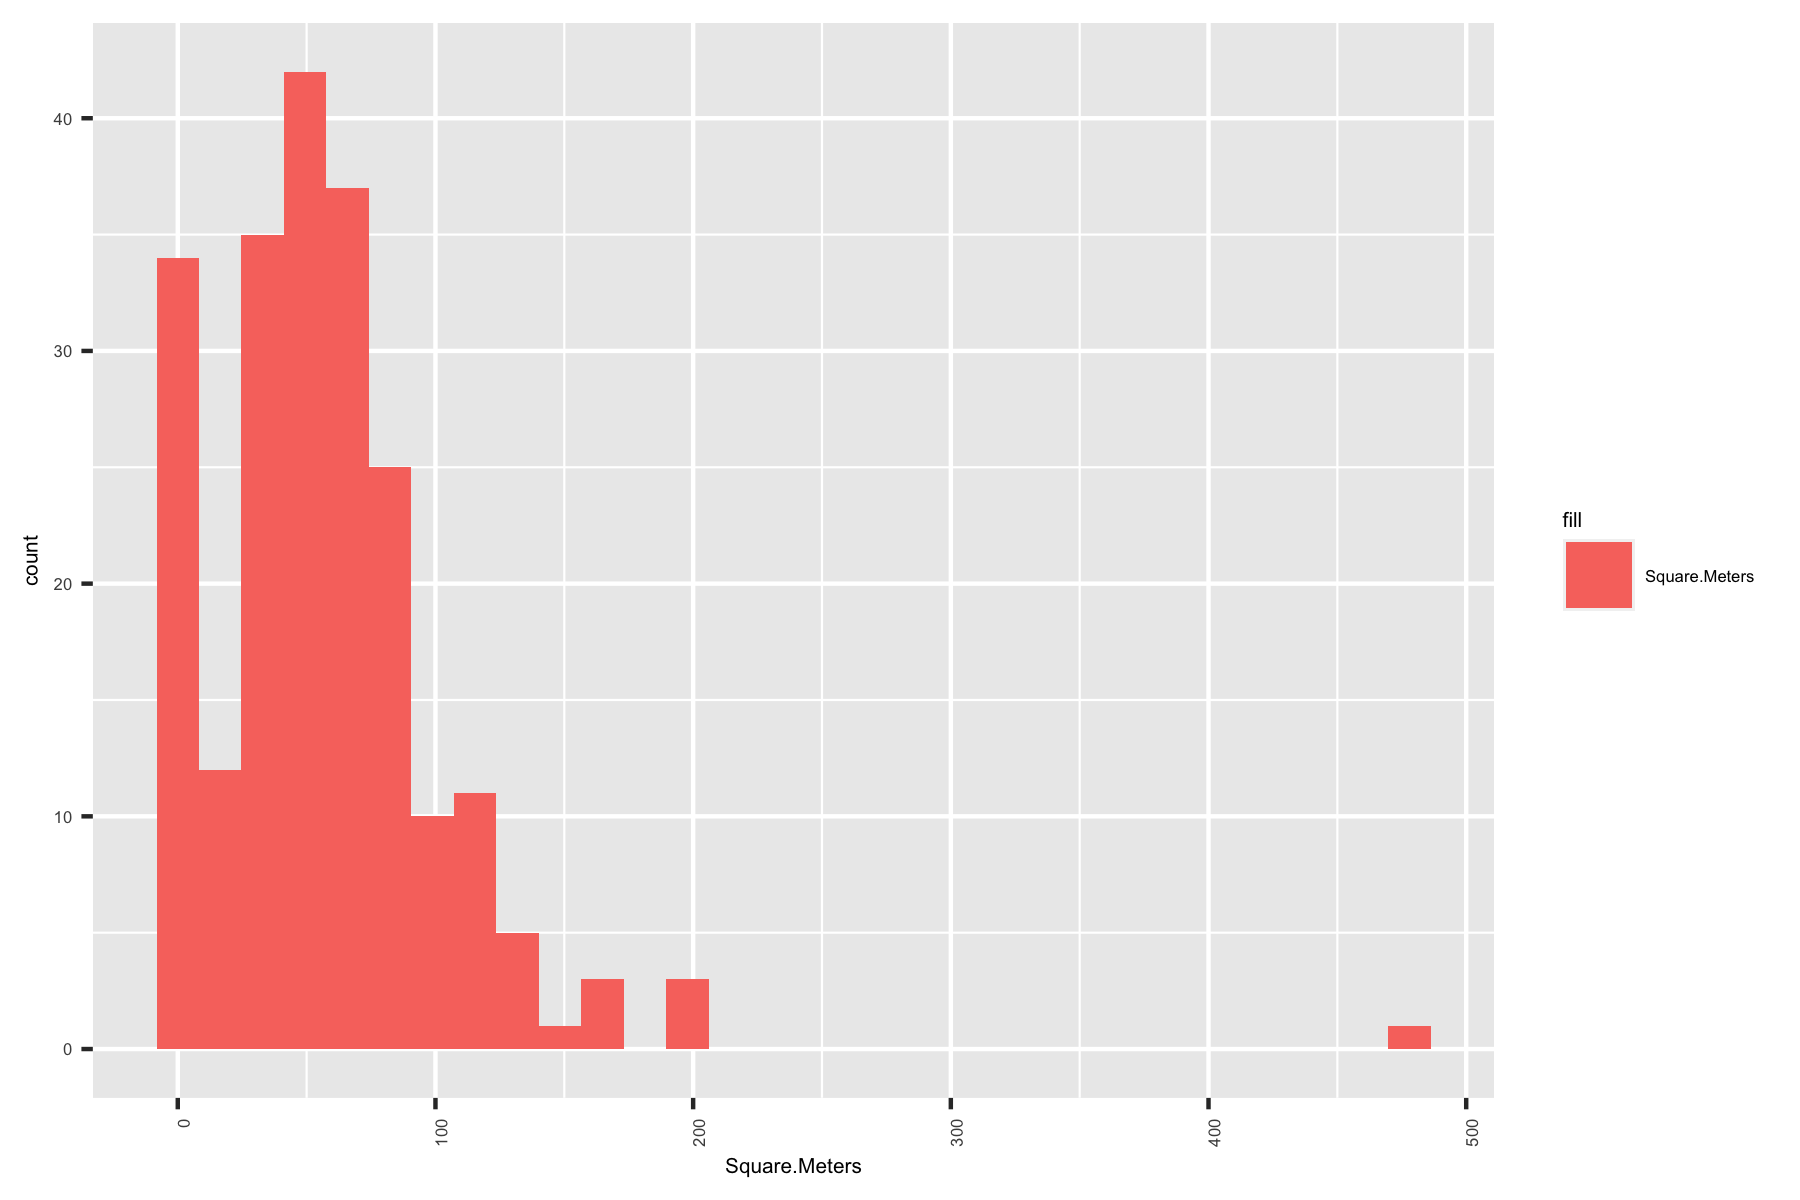

In [10]:
library(ggplot2)
ggplot(df_madrid.NoNAs, aes(x=Square.Meters, fill='Square.Meters')) + geom_histogram() + theme(text = element_text(size=5), axis.text.x = element_text(angle=90, hjust=1)) 

Asigna el valor NA a la columna Square.Meters de los apartamentos que tengan menos de 20 m^2

In [11]:
df_madrid[which(df_madrid$Square.Meters < 20),] <- NA
#df_madrid$Square.Meters <- as.factor(df_madrid$Square.Meters)
summary(df_madrid$Square.Meters)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  22.02   44.97   60.02   70.91   79.99  480.03    5427 

Existen varios Barrios que todas sus entradas son NA, vamos a eliminar del dataset todos los pisos que pertenecen a estos barrios.

In [12]:
library(dplyr)
df_madrid.NA <- df_madrid %>% mutate(Meters.NA = ifelse(is.na(Square.Meters),1,0)) %>% 
                group_by(Neighbourhood) %>% 
                summarise(NA.Number=sum(Meters.NA))

df_madrid.NoNA <- df_madrid %>% mutate(Meters.NA = ifelse(!is.na(Square.Meters),1,0)) %>% 
                group_by(Neighbourhood) %>% 
                summarise(NoNA.Number=sum(Meters.NA))
df_madrid.NANoNA <- merge(df_madrid.NA, df_madrid.NoNA, by = 'Neighbourhood')
df_madrid.NANoNA$Total <- df_madrid.NANoNA$NA.Number + df_madrid.NANoNA$NoNA.Number
df_madrid.SoloNA <- df_madrid.NANoNA %>% group_by(Neighbourhood) %>% filter(NA.Number == Total)
df_madrid.SoloNA <- df_madrid.SoloNA %>% group_by(Neighbourhood) %>% filter(!is.na(Neighbourhood))
list(df_madrid.SoloNA$Neighbourhood)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



[[1]]
 [1] Aluche              Arganzuela          Atocha             
 [4] Bellas Vistas       Berruguete          Castillejos        
 [7] Delicias            Estrella            Fuencarral-El Pardo
[10] Fuencarral-el Pardo Gaztambide          Guindalera         
[13] Hispanoamérica      Hortaleza           Ibiza              
[16] Imperial            La Chopera          Legazpi            
[19] Moncloa             Nueva España        Prosperidad        
[22] Puente de Vallecas  Tetuán              Valdeacederas      
[25] Vallehermosa        Villa de Vallecas   Villaverde         
391 Levels:  Acacias Acton Adams Morgan Adelfas Agios Nikolaos ... Østerbro

In [13]:
listaNA <- list('Aluche','Arganzuela','Atocha','Bellas','Vistas','Berruguete','Castillejos','Delicias','Estrella','Fuencarral-El Pardo','Fuencarral-el Pardo','Gaztambide','Guindalera','Hispanoamérica','Hortaleza','Ibiza','Imperial','La Chopera','Legazpi','Moncloa','Nueva','España','Prosperidad','Puente de Vallecas','Tetuán','Valdeacederas','Vallehermosa','Villa de Vallecas','Villaverde')
df_madrid.NEW <- df_madrid[ ! df_madrid$Neighbourhood %in% listaNA, ]
df_madrid.NEW <- df_madrid.NEW %>% group_by(Neighbourhood) %>% filter(!is.na(Neighbourhood))
dim(df_madrid.NEW)
summary(df_madrid$Square.Meters)
summary(df_madrid.NEW$Square.Meters)


[1] 4793   13

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  22.02   44.97   60.02   70.91   79.99  480.03    5427 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  22.02   44.97   60.02   70.91   79.99  480.03    4619 

In [14]:
Barrios.SinNA = unique(unlist(df_madrid.SoloNA$Neighbourhood))
length(Barrios.SinNA)

[1] 27

In [15]:
sort(table(df_madrid.NEW$Neighbourhood), decreasing = T)


                           Malasaña                         Embajadores 
                                654                                 565 
                          La Latina                                 Sol 
                                550                                 509 
                             Cortes                            Justicia 
                                422                                 375 
                            Palacio                           Trafalgar 
                                287                                 150 
                          Argüelles                                Goya 
                                114                                 107 
                          Recoletos                     Palos do Moguer 
                                 93                                  91 
                            Almagro                       Ciudad Lineal 
                                 74               

In [16]:
nrow(df_madrid.NEW[which(df_madrid.NEW$Neighbourhood == 'Lista' & !is.na(df_madrid.NEW$Square.Meters)),])

[1] 2

----------------

*En un punto más avanzado de la práctica, observé que había un barrio llamado **Lista**. Pensé que sería ruido, así que volví a este punto para realizar estas últimas operaciones con las que pretendía conocer el número de registros de Lista (**47**) y determinar de todos ellos cuántos tienen datos númericos de metros cuadrados (**2**). Para valorar así si prescindir de este registro completo.*

*Afortunadamente, la inspiración me hizo comprobar en **Wikipedia** que **Lista** es un barrio de Madrid.*

*Moraleja: "Sin cultura general, ni Data Scientist ni ná"*

------------

Warning message:
“Removed 4619 rows containing non-finite values (stat_density).”

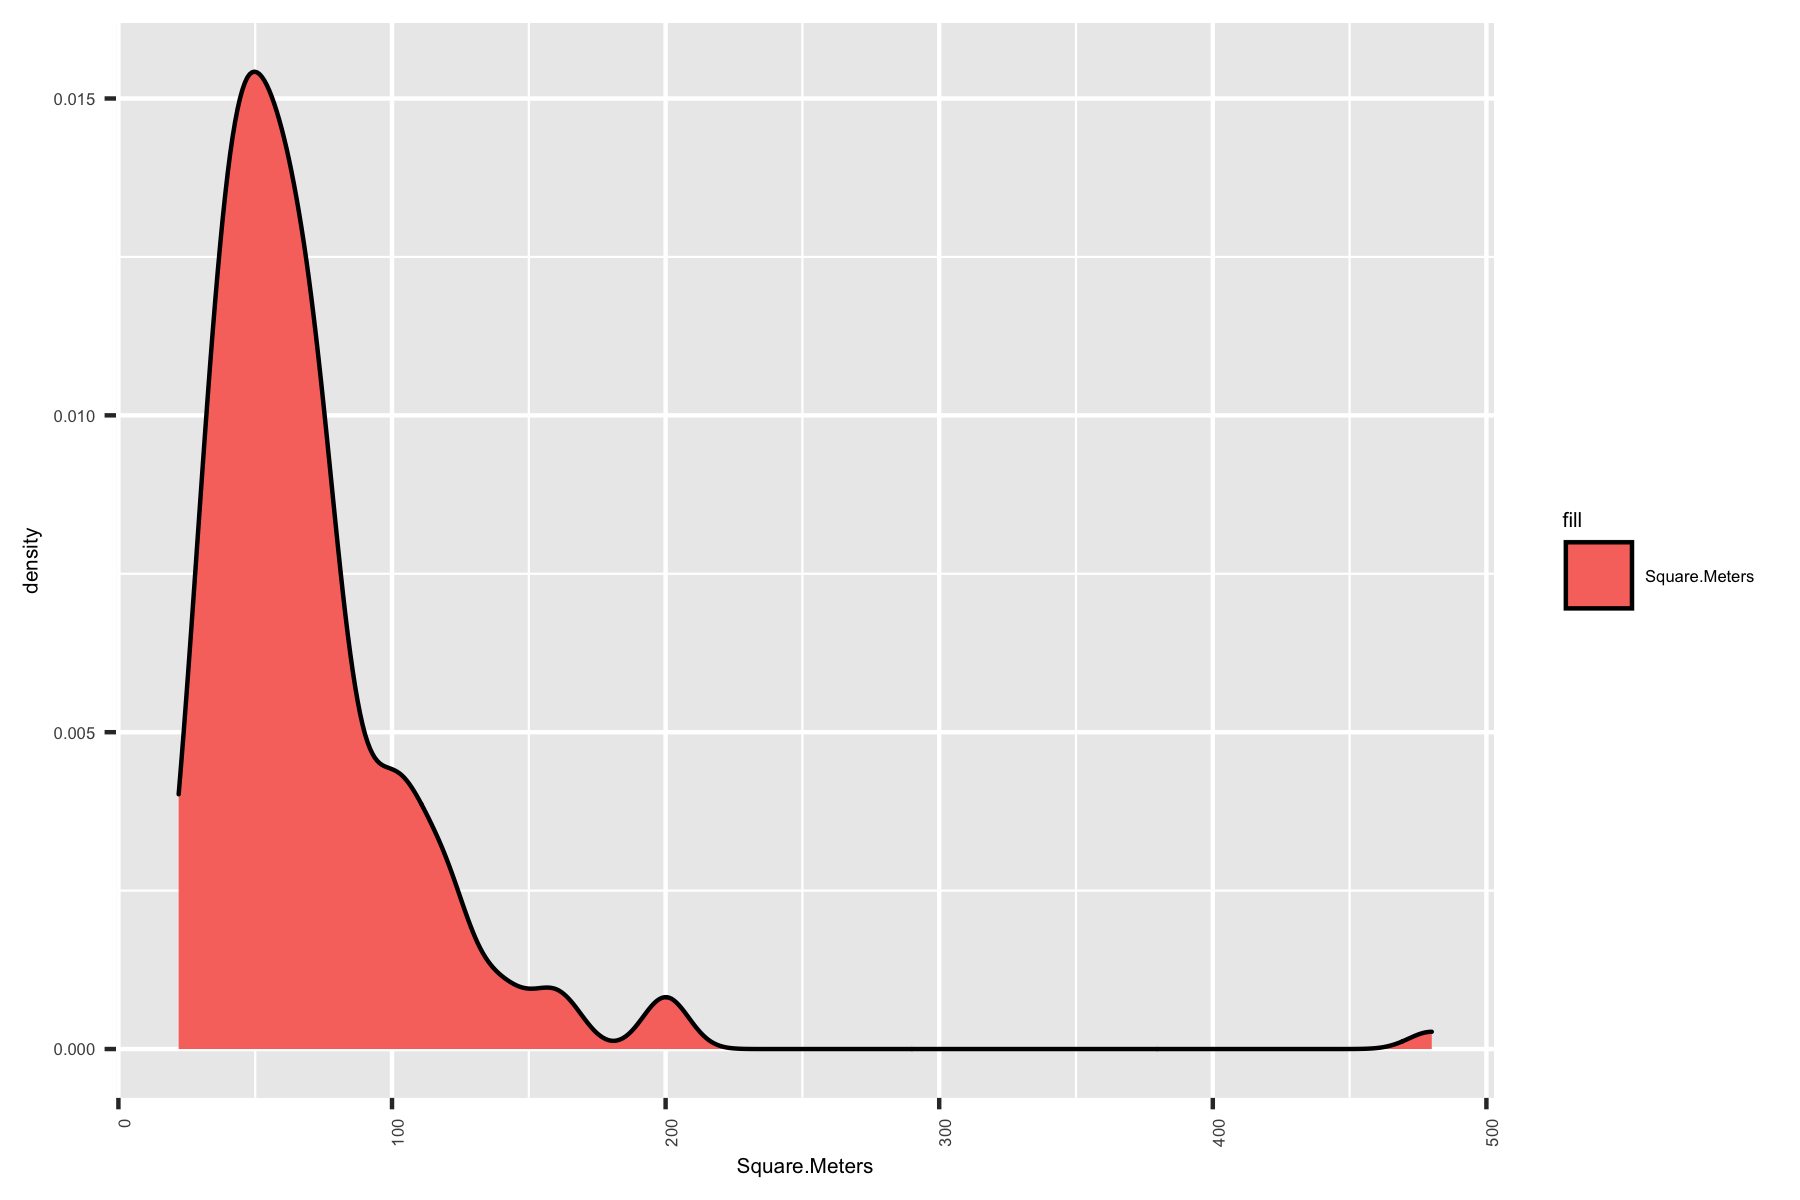

In [17]:
library(ggplot2)
ggplot(df_madrid.NEW, aes(x=Square.Meters, fill='Square.Meters')) + geom_density() + theme(text = element_text(size=5), axis.text.x = element_text(angle=90, hjust=1)) 

El barrio parece ser un indicador importante para los metros cuadrados de un apartamento.

Vamos a agrupar los barrios por metros cuadrados. Podemos usar una matriz de similaridad de Tukey tal y como hicimos en el curso de estadística:

In [18]:
df_anova <- aov(Square.Meters~Neighbourhood, data=df_madrid.NEW)
summary(df_anova)

               Df Sum Sq Mean Sq F value   Pr(>F)    
Neighbourhood  37 167320    4522   2.986 2.21e-06 ***
Residuals     136 205991    1515                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
4619 observations deleted due to missingness

In [19]:
df_tky<-TukeyHSD(df_anova)
df_tky

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Square.Meters ~ Neighbourhood, data = df_madrid.NEW)

$Neighbourhood
                                          diff         lwr         upr
Adelfas-Acacias                   4.985794e+00 -172.637646  182.609235
Almagro-Acacias                  -1.498835e+01 -192.611791  162.635090
Almenara-Acacias                  1.028127e+00 -111.310801  113.367054
Arapiles-Acacias                  3.253153e+01 -107.892126  172.955194
Argüelles-Acacias                 1.901415e+01 -106.584592  144.612887
Barajas-Acacias                  -2.799477e+01 -205.618211  149.628670
Carabanchel-Acacias               1.167481e+01 -113.923929  137.273550
Castellana-Acacias                5.171600e+01  -73.882736  177.314743
Castilla-Acacias                  1.703222e+01 -108.566523  142.630956
Centro-Acacias                   -3.997926e+01 -217.602698  137.644183
Chamberí-Acacias                 -4.954827e+00 -182.578

Warning message in resm[lower.tri(resm)] <- round(tky.result$p.adj, 4):
“número de items para para sustituir no es un múltiplo de la longitud del reemplazo”

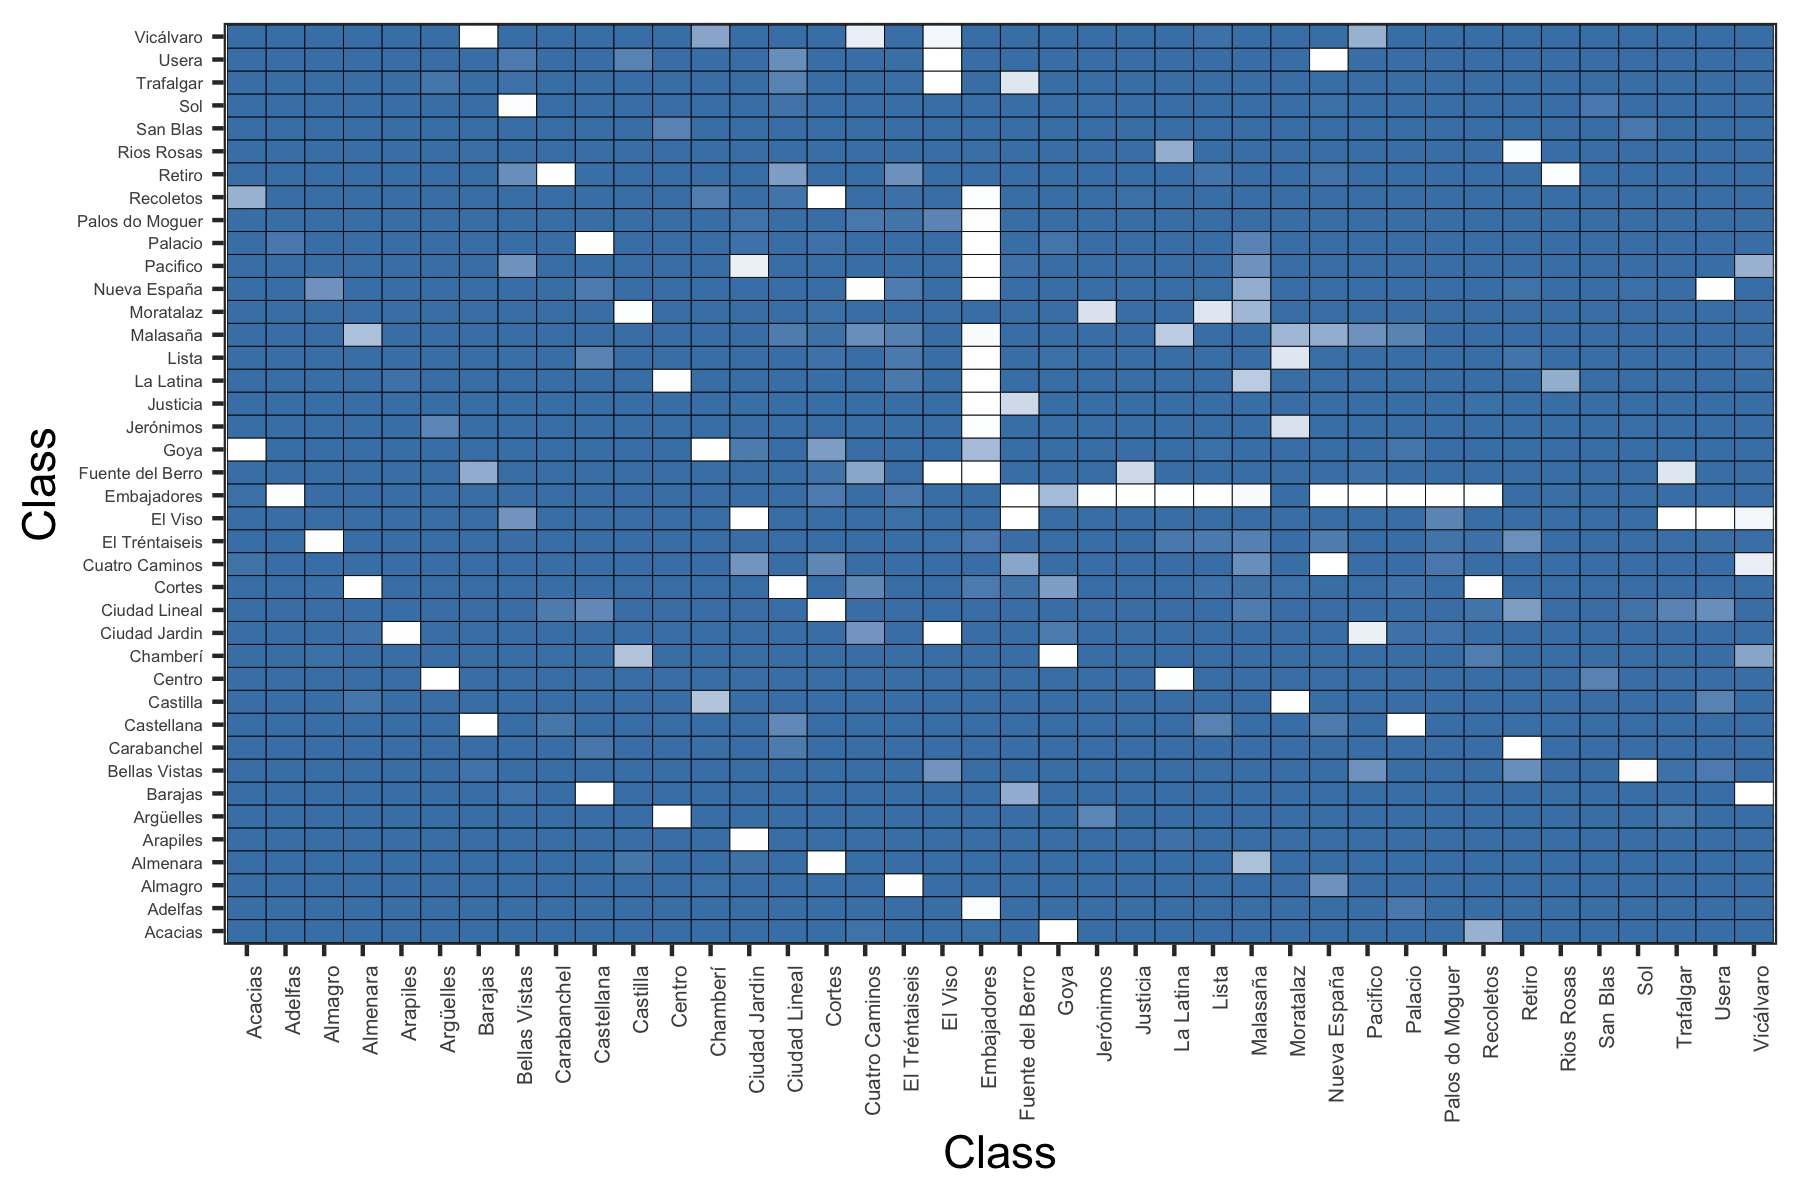

In [20]:
tky<-TukeyHSD(aov( formula=Square.Meters~Neighbourhood, data=df_madrid.NEW ))
tky.result<-data.frame(tky$Neighbourhood)
cn <-sort(unique(df_madrid.NEW$Neighbourhood))
resm <- matrix(NA, length(cn),length(cn))
rownames(resm) <- cn
colnames(resm) <- cn
resm[lower.tri(resm) ] <- round(tky.result$p.adj,4)
resm[upper.tri(resm) ] <- t(resm)[upper.tri(resm)] 
diag(resm) <- 1
library(ggplot2)
library(reshape2)
dfResm <- melt(resm)
ggplot(dfResm, aes(x=Var1, y=Var2, fill=value))+
  geom_tile(colour = "black")+
  scale_fill_gradient(low = "white",high = "steelblue")+
  ylab("Class")+xlab("Class")+theme_bw()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1, size=5), axis.text.y = element_text(hjust = 1, size=4), legend.position="none")

In [21]:
resm_ <- 1-resm
resm_
dim(resm_)

,Acacias,Adelfas,Almagro,Almenara,Arapiles,Argüelles,Barajas,Bellas Vistas,Carabanchel,Castellana,...,Palacio,Palos do Moguer,Recoletos,Retiro,Rios Rosas,San Blas,Sol,Trafalgar,Usera,Vicálvaro
Acacias,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0002,0.0000,...,0.0000,0.0000,0.5018,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Adelfas,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0784,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Almagro,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0012,0.0000
Almenara,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Arapiles,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0005,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Argüelles,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0015,0.0000,0.0000,0.0003,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0657,0.0000,0.0000
Barajas,0.0000,0.0000,0.0000,0.0000,0.0005,0.0015,0.0000,0.0367,0.0000,0.9987,...,0.0000,0.0000,0.0000,0.0000,0.0066,0.0000,0.0000,0.0020,0.0000,0.9999
Bellas Vistas,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0367,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0005,0.2517,0.0000,0.0000,0.9886,0.0250,0.1058,0.0000
Carabanchel,0.0002,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0684,...,0.0000,0.0006,0.0000,0.9998,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Castellana,0.0000,0.0000,0.0000,0.0000,0.0000,0.0003,0.9987,0.0000,0.0684,0.0000,...,0.9995,0.0000,0.0000,0.0081,0.0000,0.0017,0.0001,0.0000,0.0000,0.0000


[1] 40 40

Usando como variable de distancia: 1-resm
Dibuja un dendrograma de los diferentes barrios.


In [22]:
resm_ <- as.dist(resm_)
df_c <- hclust(resm_, method="average")
df_dendo <- as.dendrogram(df_c)

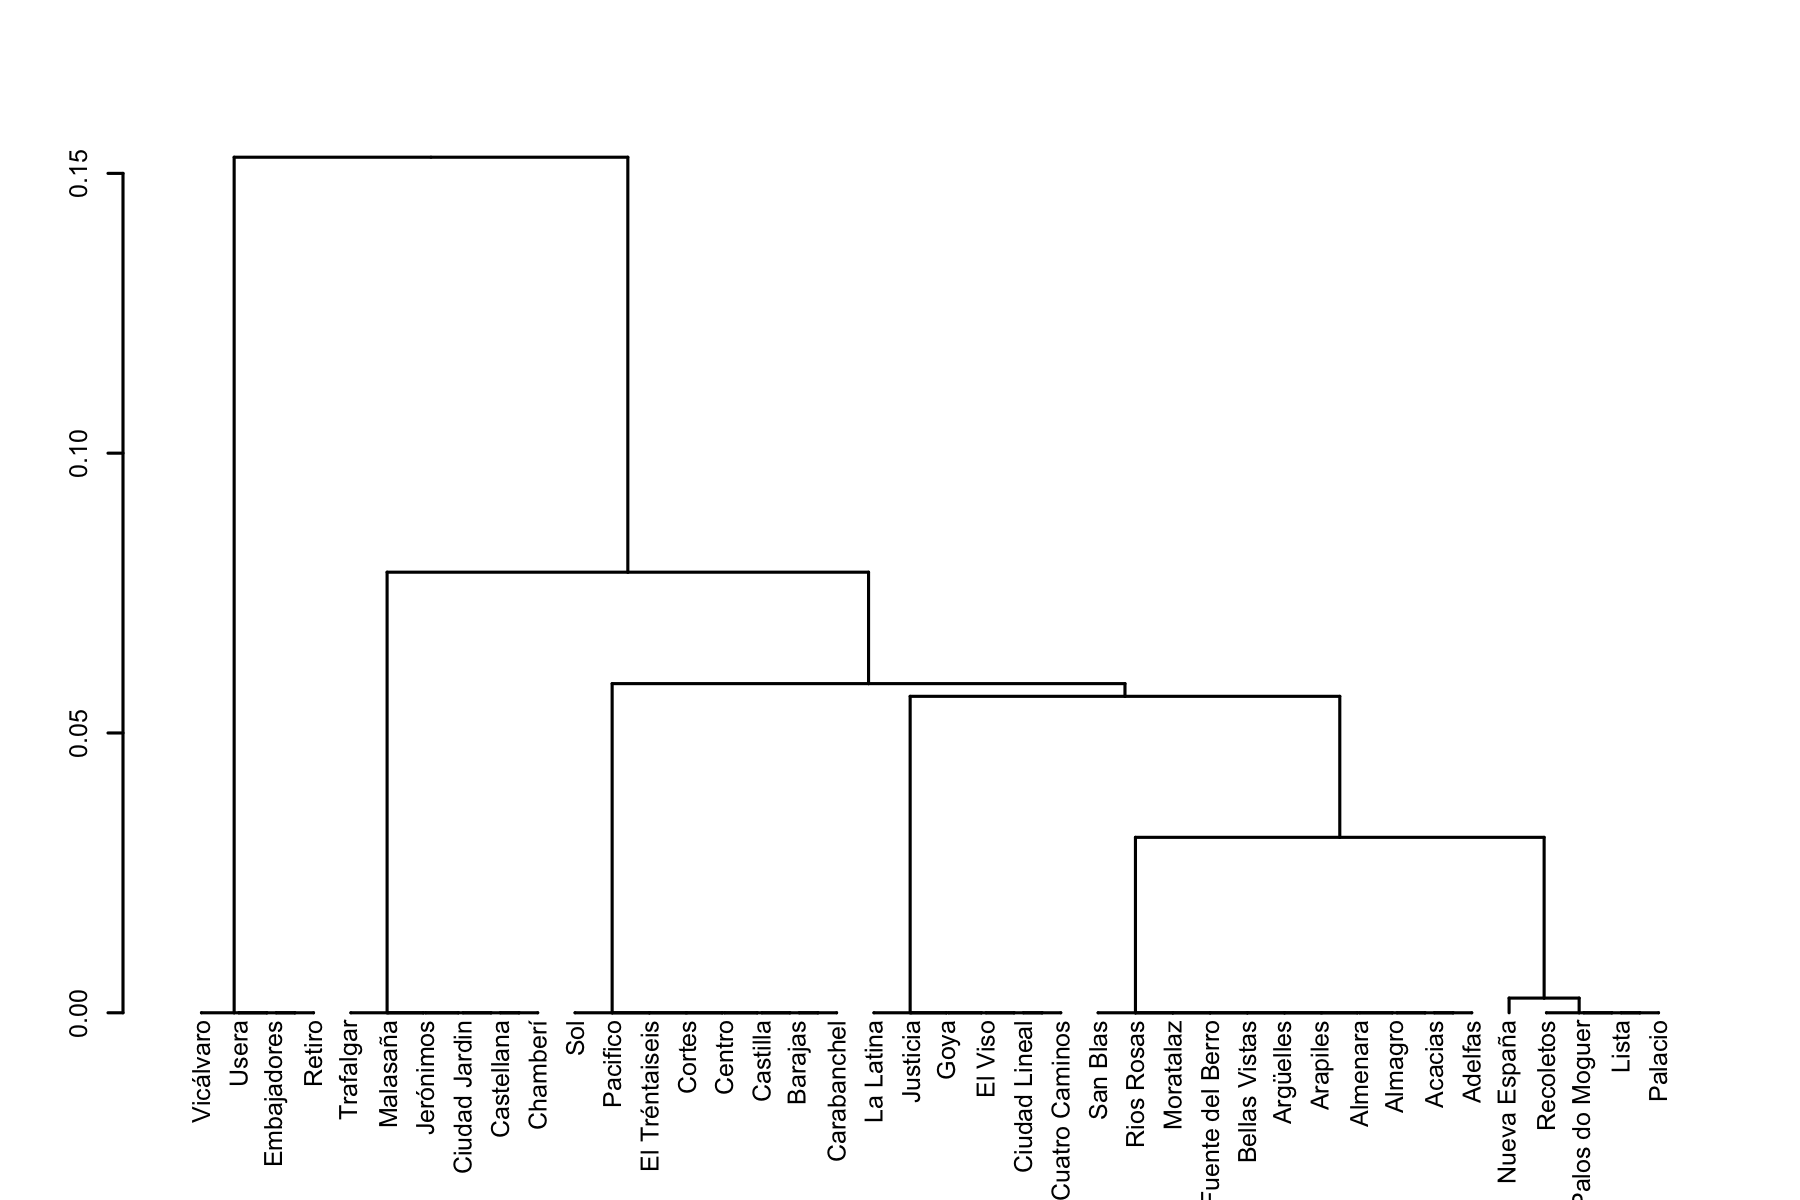

In [23]:
par(cex=0.5)
plot(df_dendo)

¿Que punto de corte sería el aconsejable?, ¿cuantos clusters aparecen?

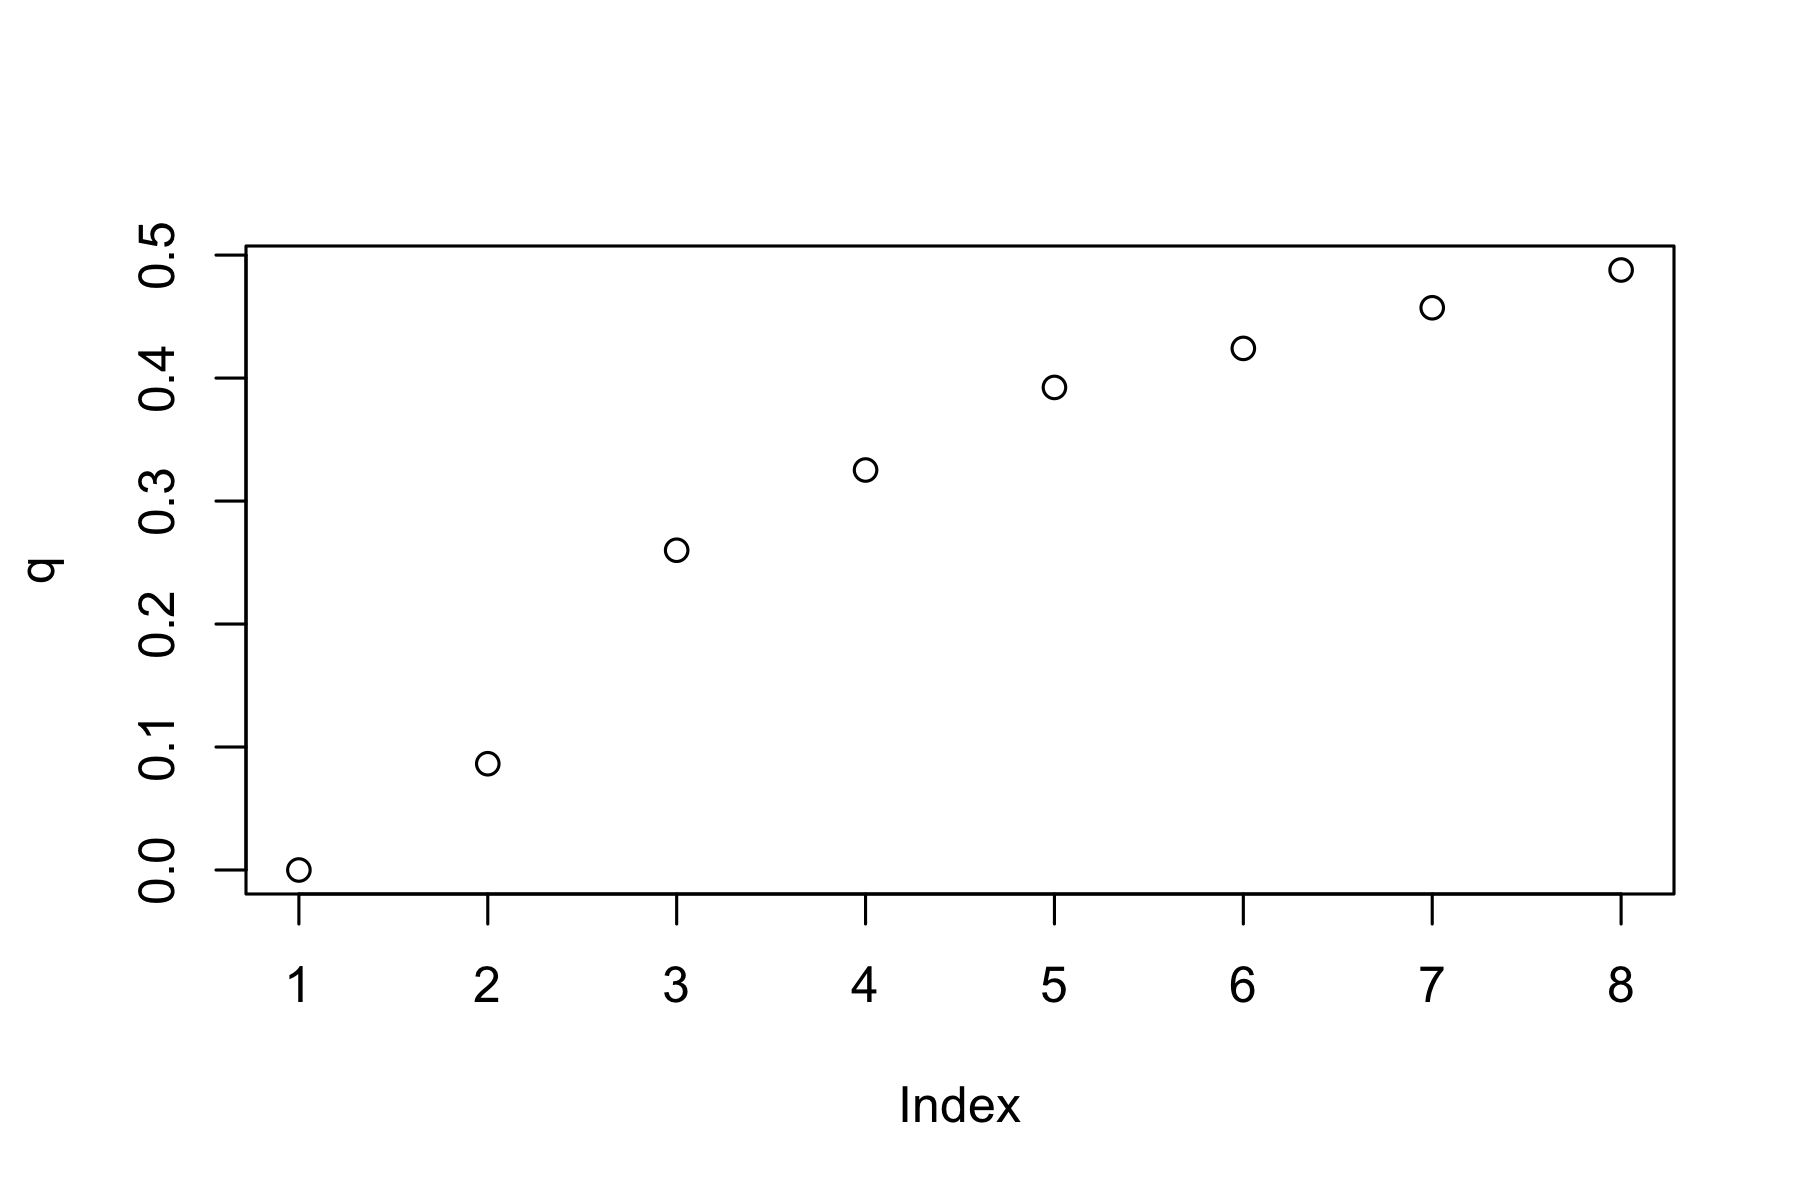

In [24]:
q<-c()
for (k in 1:8){
    myclust<-kmeans(resm_,k)
    q[k]<-myclust$betweenss/myclust$totss
}
plot(q)

In [25]:
cut(df_dendo, h = 0.04)$lower

[[1]]
'dendrogram' with 2 branches and 4 members total, at height 0 

[[2]]
'dendrogram' with 2 branches and 6 members total, at height 0 

[[3]]
'dendrogram' with 2 branches and 8 members total, at height 0 

[[4]]
'dendrogram' with 2 branches and 6 members total, at height 0 

[[5]]
'dendrogram' with 2 branches and 16 members total, at height 0.03135091 


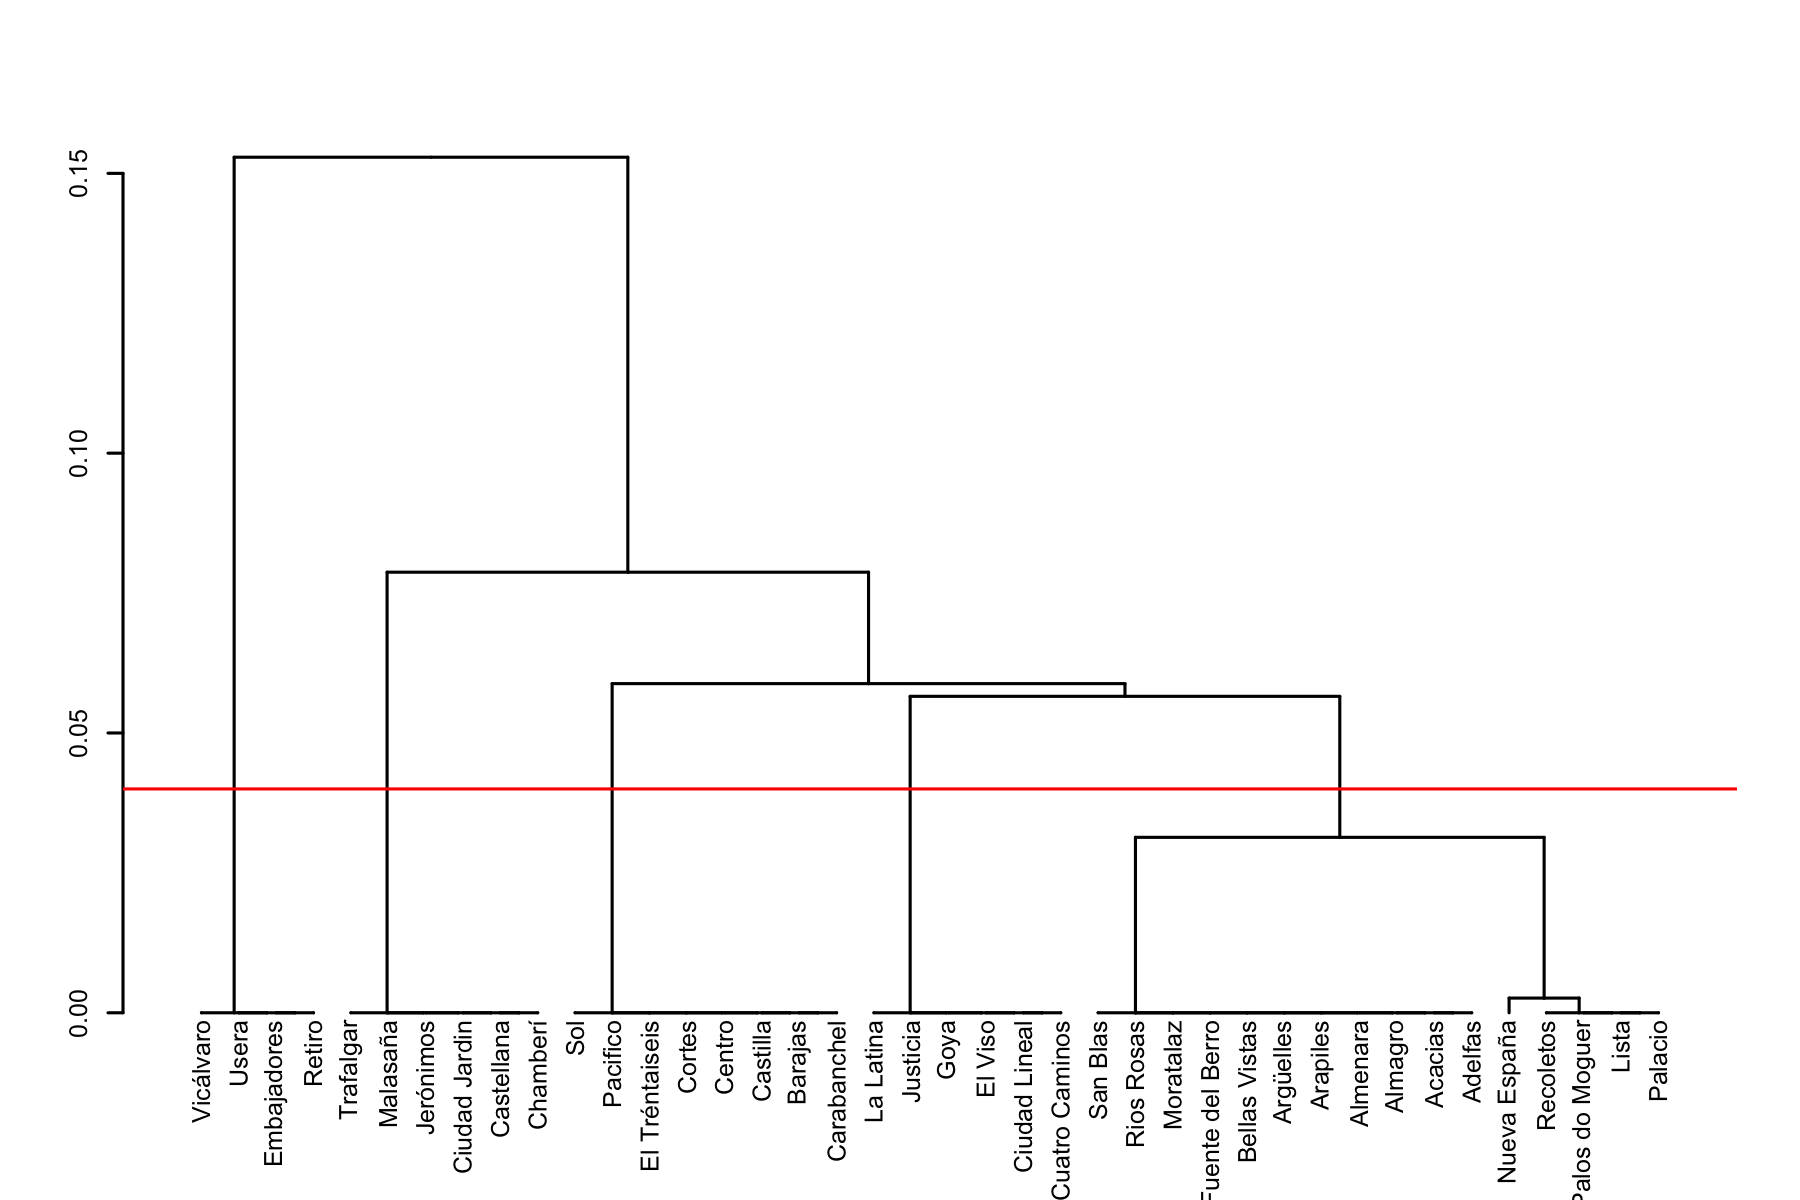

In [26]:
par(cex=0.5)
plot(df_dendo)
abline(h=0.04 ,col="red")

-------------

*0.04 sería un punto de corte aceptable para 5 clusters*

-----------------

Vamos a crear una nueva columna en el dataframe df_madrid con un nuevo identificador marcado por los clusters obtenidos. Esta columna la llamaremos neighb_id

In [27]:
table(cutree(df_c, k=5))


 1  2  3  4  5 
16  8  6  6  4 

In [31]:
cutclust_madrid<-cutree(df_c, k=5)
df_cutclust <- as.data.frame(cutclust_madrid, colnames(c('Neighbourhood', 'neighb_id')))
df_cutclust <- cbind(Neighbourhood = rownames(df_cutclust), df_cutclust)
rownames(df_cutclust) <- NULL
colnames(df_cutclust)[2] <- 'neighb_id'
df_madrid.NEW <- merge(df_madrid.NEW, df_cutclust, by='Neighbourhood')
summary(df_madrid.NEW)

     Neighbourhood   Accommodates      Bathrooms        Bedrooms     
 Malasaña   : 654   Min.   : 1.000   Min.   :0.000   Min.   : 0.000  
 Embajadores: 565   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.000  
 La Latina  : 550   Median : 4.000   Median :1.000   Median : 1.000  
 Sol        : 509   Mean   : 4.084   Mean   :1.246   Mean   : 1.422  
 Cortes     : 422   3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.000  
 Justicia   : 375   Max.   :16.000   Max.   :6.000   Max.   :10.000  
 (Other)    :1718                    NA's   :12      NA's   :6       
      Beds            Price         Square.Feet     Guests.Included 
 Min.   : 1.000   Min.   : 18.00   Min.   : 237.0   Min.   : 1.000  
 1st Qu.: 1.000   1st Qu.: 58.00   1st Qu.: 484.0   1st Qu.: 1.000  
 Median : 2.000   Median : 75.00   Median : 646.0   Median : 2.000  
 Mean   : 2.364   Mean   : 90.57   Mean   : 763.2   Mean   : 1.946  
 3rd Qu.: 3.000   3rd Qu.:100.00   3rd Qu.: 861.0   3rd Qu.: 2.000  
 Max.   :16.000   Max.   :

Vamos a crear dos grupos, uno test y otro train.

Tratamos de predecir los metros cuadrados en función del resto de columnas del dataframe.

In [32]:
str(df_madrid.NEW)

'data.frame':	4793 obs. of  14 variables:
 $ Neighbourhood       : Factor w/ 391 levels "","Acacias","Acton",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Accommodates        : int  4 4 2 5 2 2 2 3 3 4 ...
 $ Bathrooms           : num  2 1 1 2 0.5 1 1 1 1 1 ...
 $ Bedrooms            : int  2 2 2 2 0 1 1 2 1 3 ...
 $ Beds                : int  2 3 1 2 2 1 1 2 2 3 ...
 $ Price               : int  65 100 75 120 30 68 75 55 45 60 ...
 $ Square.Feet         : int  NA NA NA NA NA NA NA NA NA NA ...
 $ Guests.Included     : int  1 1 1 4 2 1 1 1 2 2 ...
 $ Extra.People        : int  0 0 0 20 0 0 0 0 10 10 ...
 $ Review.Scores.Rating: int  88 NA NA 95 81 94 100 92 100 91 ...
 $ Latitude            : num  40.4 40.4 40.4 40.4 40.4 ...
 $ Longitude           : num  -3.7 -3.71 -3.7 -3.71 -3.7 ...
 $ Square.Meters       : num  NA NA NA NA NA NA NA NA NA NA ...
 $ neighb_id           : int  1 1 1 1 1 1 1 1 1 1 ...


In [33]:
df_madrid_NEWSET <- df_madrid.NEW
df_madrid_NEWSET$Neighbourhood <- NULL
df_madrid_NEWSET$Square.Feet <- NULL
df_madrid_NEWSET$Review.Scores.Rating <- NULL
df_madrid_NEWSET$Latitude <- NULL
df_madrid_NEWSET$Longitude <- NULL
str(df_madrid_NEWSET)

'data.frame':	4793 obs. of  9 variables:
 $ Accommodates   : int  4 4 2 5 2 2 2 3 3 4 ...
 $ Bathrooms      : num  2 1 1 2 0.5 1 1 1 1 1 ...
 $ Bedrooms       : int  2 2 2 2 0 1 1 2 1 3 ...
 $ Beds           : int  2 3 1 2 2 1 1 2 2 3 ...
 $ Price          : int  65 100 75 120 30 68 75 55 45 60 ...
 $ Guests.Included: int  1 1 1 4 2 1 1 1 2 2 ...
 $ Extra.People   : int  0 0 0 20 0 0 0 0 10 10 ...
 $ Square.Meters  : num  NA NA NA NA NA NA NA NA NA NA ...
 $ neighb_id      : int  1 1 1 1 1 1 1 1 1 1 ...


In [34]:
set.seed(123)
idx<-sample(1:nrow(df_madrid_NEWSET),nrow(df_madrid_NEWSET)*0.7)
df_madrid_NEWSET.train<-df_madrid_NEWSET[idx,]
df_madrid_NEWSET.test <-df_madrid_NEWSET[-idx,]

model_df_madrid_NEWSET <- lm(Square.Meters~.,data=df_madrid_NEWSET.train)
summary(model_df_madrid_NEWSET)


Call:
lm(formula = Square.Meters ~ ., data = df_madrid_NEWSET.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-105.820  -11.355    0.098   11.398  164.349 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -3.41343    8.65483  -0.394   0.6940    
Accommodates    -0.31500    2.49440  -0.126   0.8997    
Bathrooms       35.19188    5.71904   6.153 1.05e-08 ***
Bedrooms         9.85309    4.03018   2.445   0.0160 *  
Beds             6.45423    2.59089   2.491   0.0141 *  
Price            0.04827    0.04472   1.079   0.2826    
Guests.Included -2.57055    2.46054  -1.045   0.2983    
Extra.People     0.49473    0.28506   1.736   0.0852 .  
neighb_id       -2.68911    1.87480  -1.434   0.1541    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 26.99 on 119 degrees of freedom
  (3227 observations deleted due to missingness)
Multiple R-squared:  0.7246,	Adjusted R-squared:  0.7061 
F-statist

[1] "MSE: NA"

[1] "R^2: NA"

RMSE  Rsquared       MAE 
       NA 0.7245755        NA

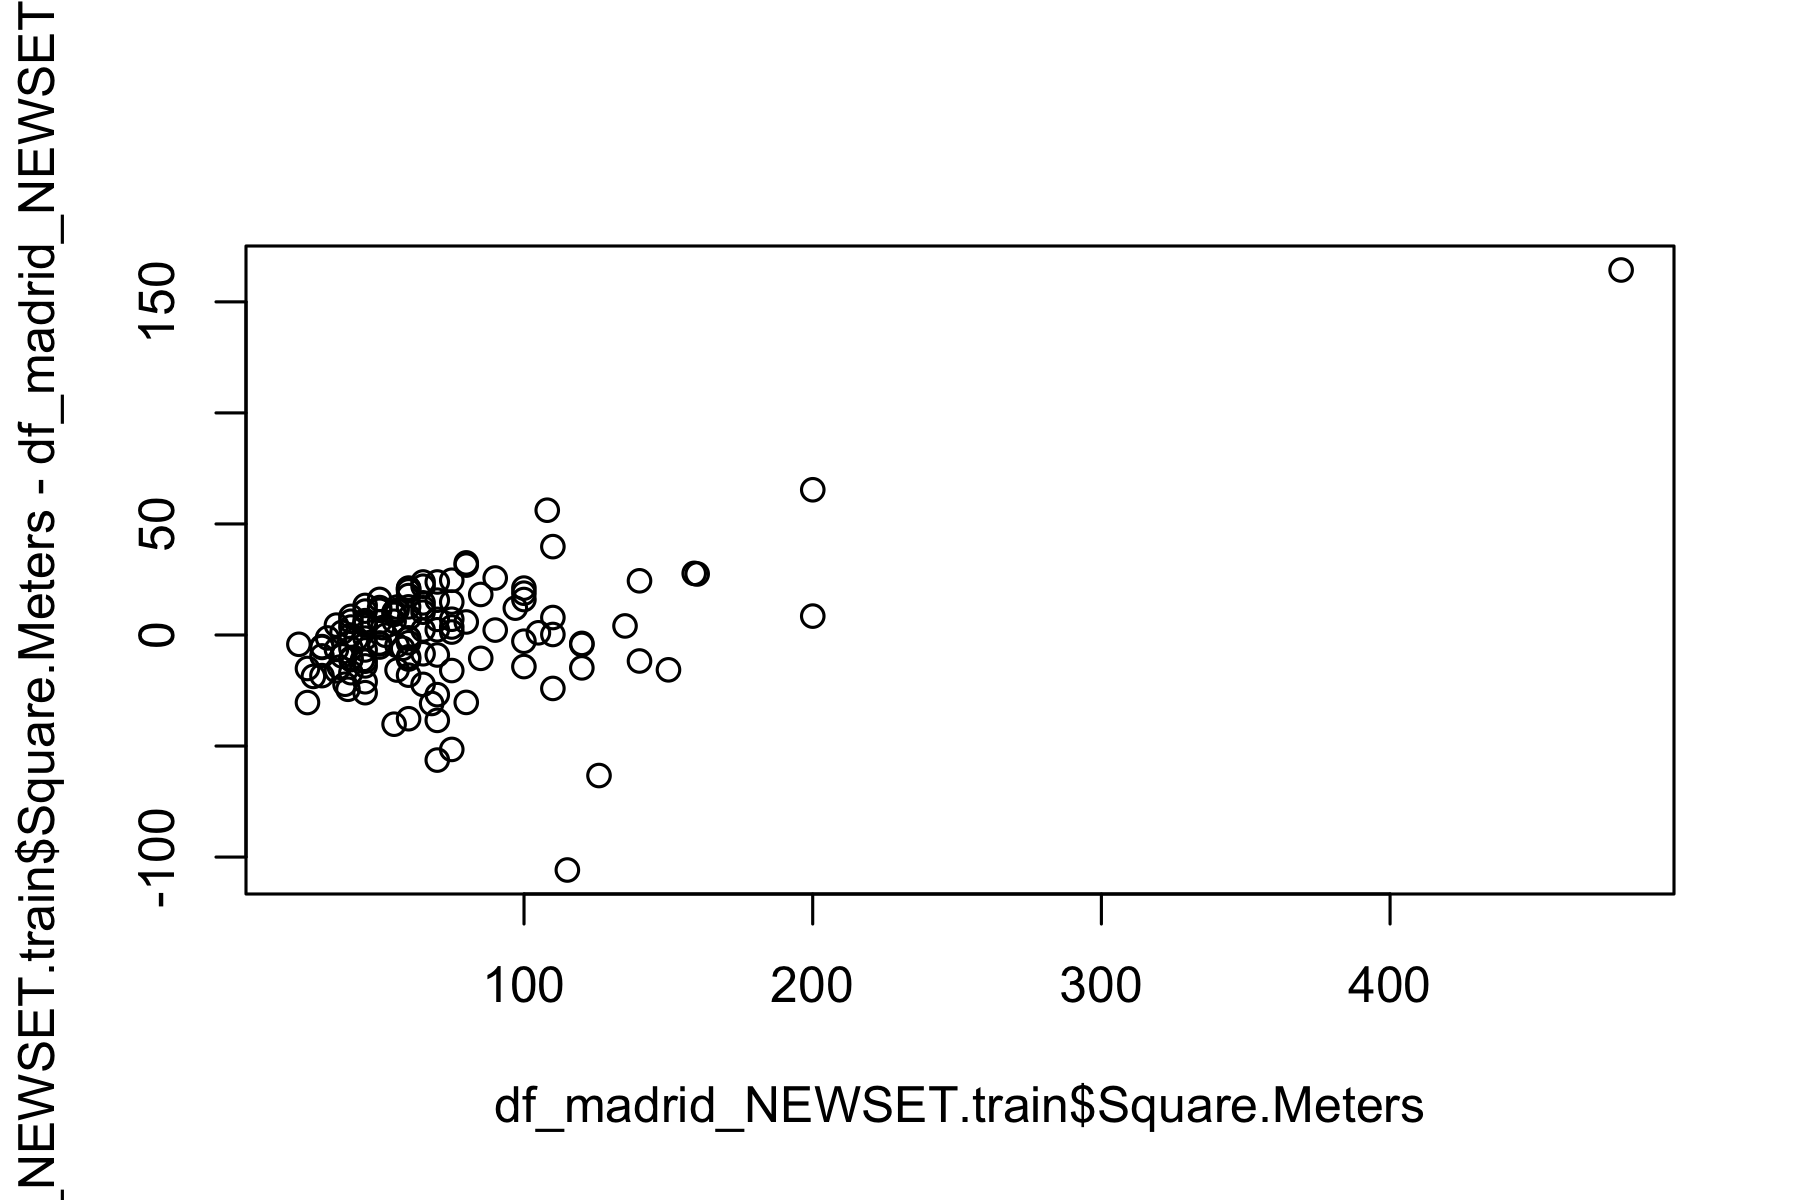

In [36]:
df_madrid_NEWSET.train$sm_est<-predict(model_df_madrid_NEWSET,df_madrid_NEWSET.train)

plot(df_madrid_NEWSET.train$Square.Meters,(df_madrid_NEWSET.train$Square.Meters-df_madrid_NEWSET.train$sm_est))
myrsquared <- function (x, y) cor(x, y) ^ 2
paste("MSE:", sqrt(mean((df_madrid_NEWSET.train$Square.Meters-df_madrid_NEWSET.train$sm_est)^2)))
paste("R^2:", myrsquared(df_madrid_NEWSET.train$Square.Meters,df_madrid_NEWSET.train$sm_est))
caret::postResample(pred=df_madrid_NEWSET.train$sm_est, obs= df_madrid_NEWSET.train$Square.Meters)

Mirad el histograma de los residuos sobre el conjunto de test para evaluar la calidad de vuestro modelo

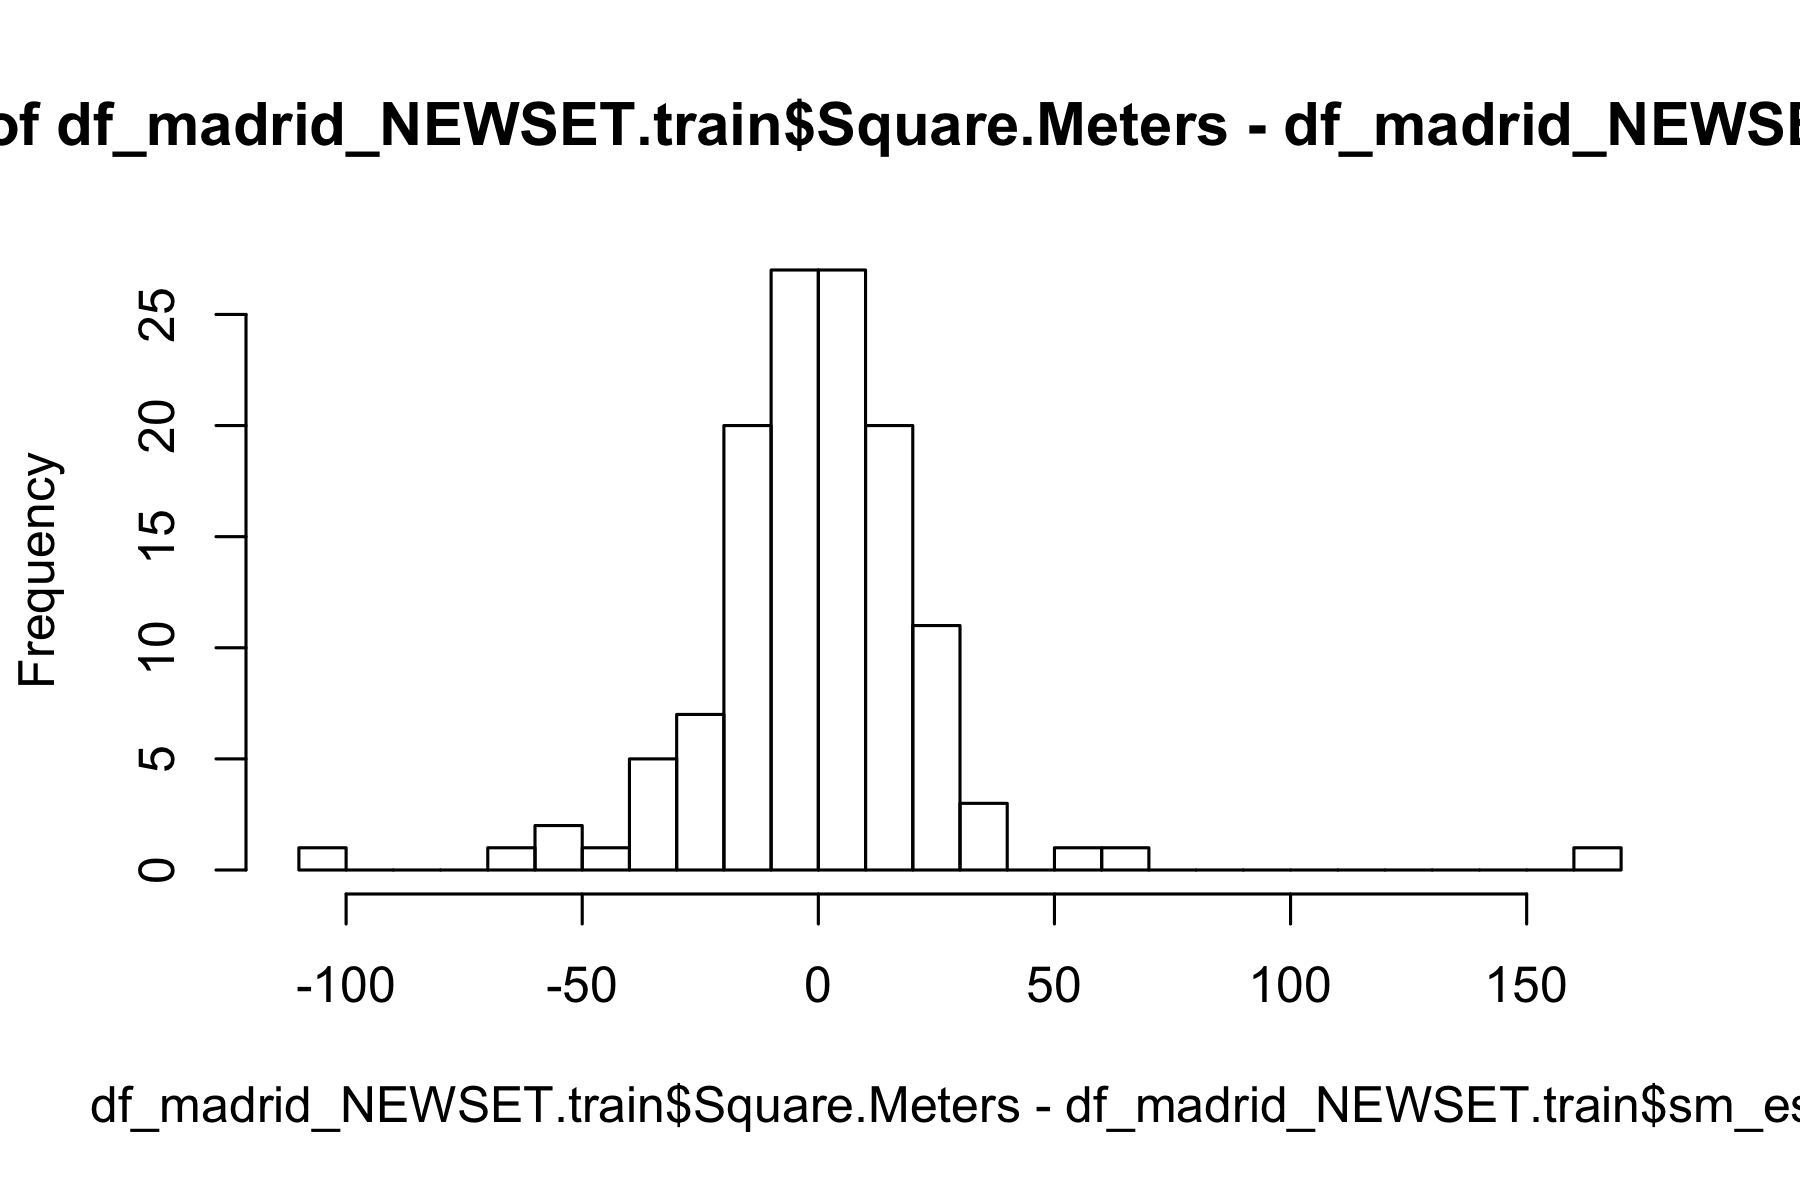

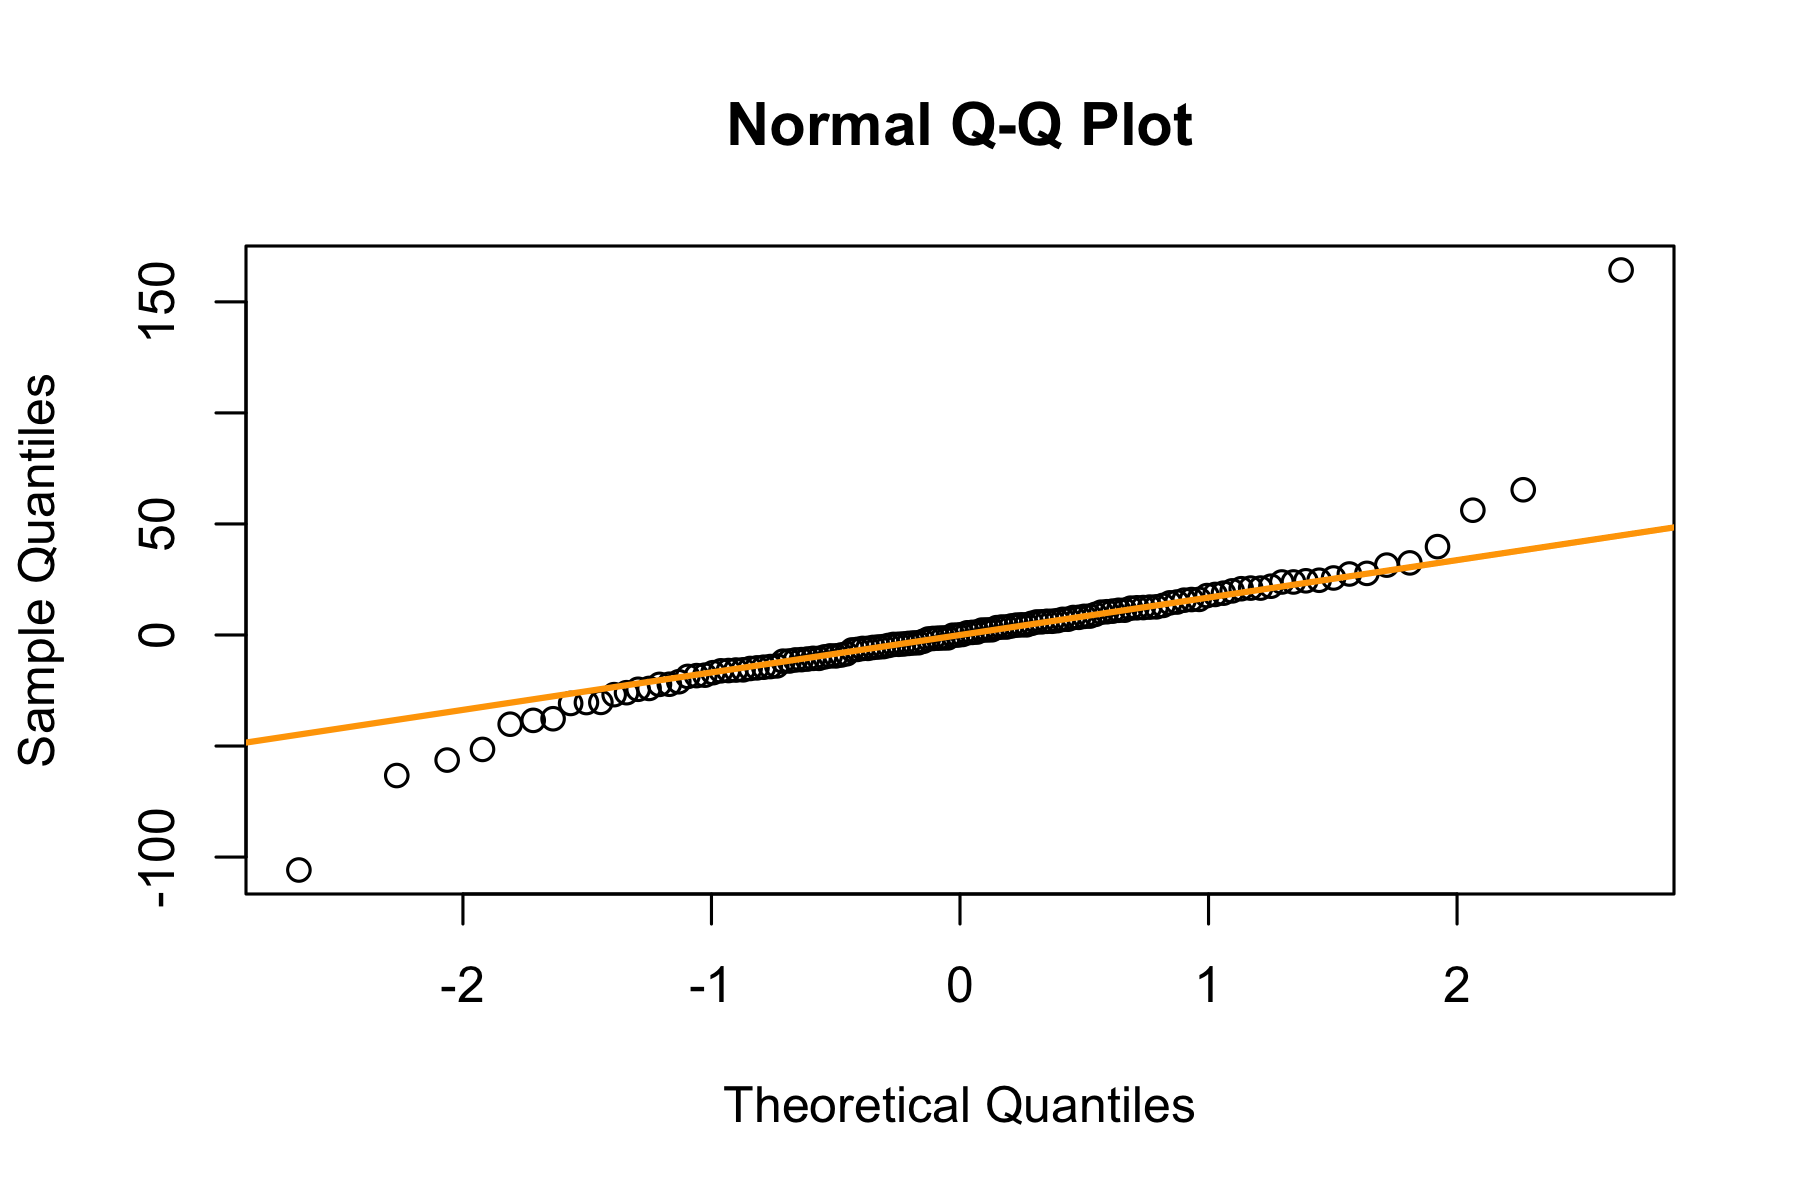

In [37]:
hist(df_madrid_NEWSET.train$Square.Meters-df_madrid_NEWSET.train$sm_est,20)
qqnorm(df_madrid_NEWSET.train$Square.Meters-df_madrid_NEWSET.train$sm_est)
qqline(df_madrid_NEWSET.train$Square.Meters-df_madrid_NEWSET.train$sm_est, col = 'orange', lwd =2)

RMSE  Rsquared       MAE 
       NA 0.5624216        NA

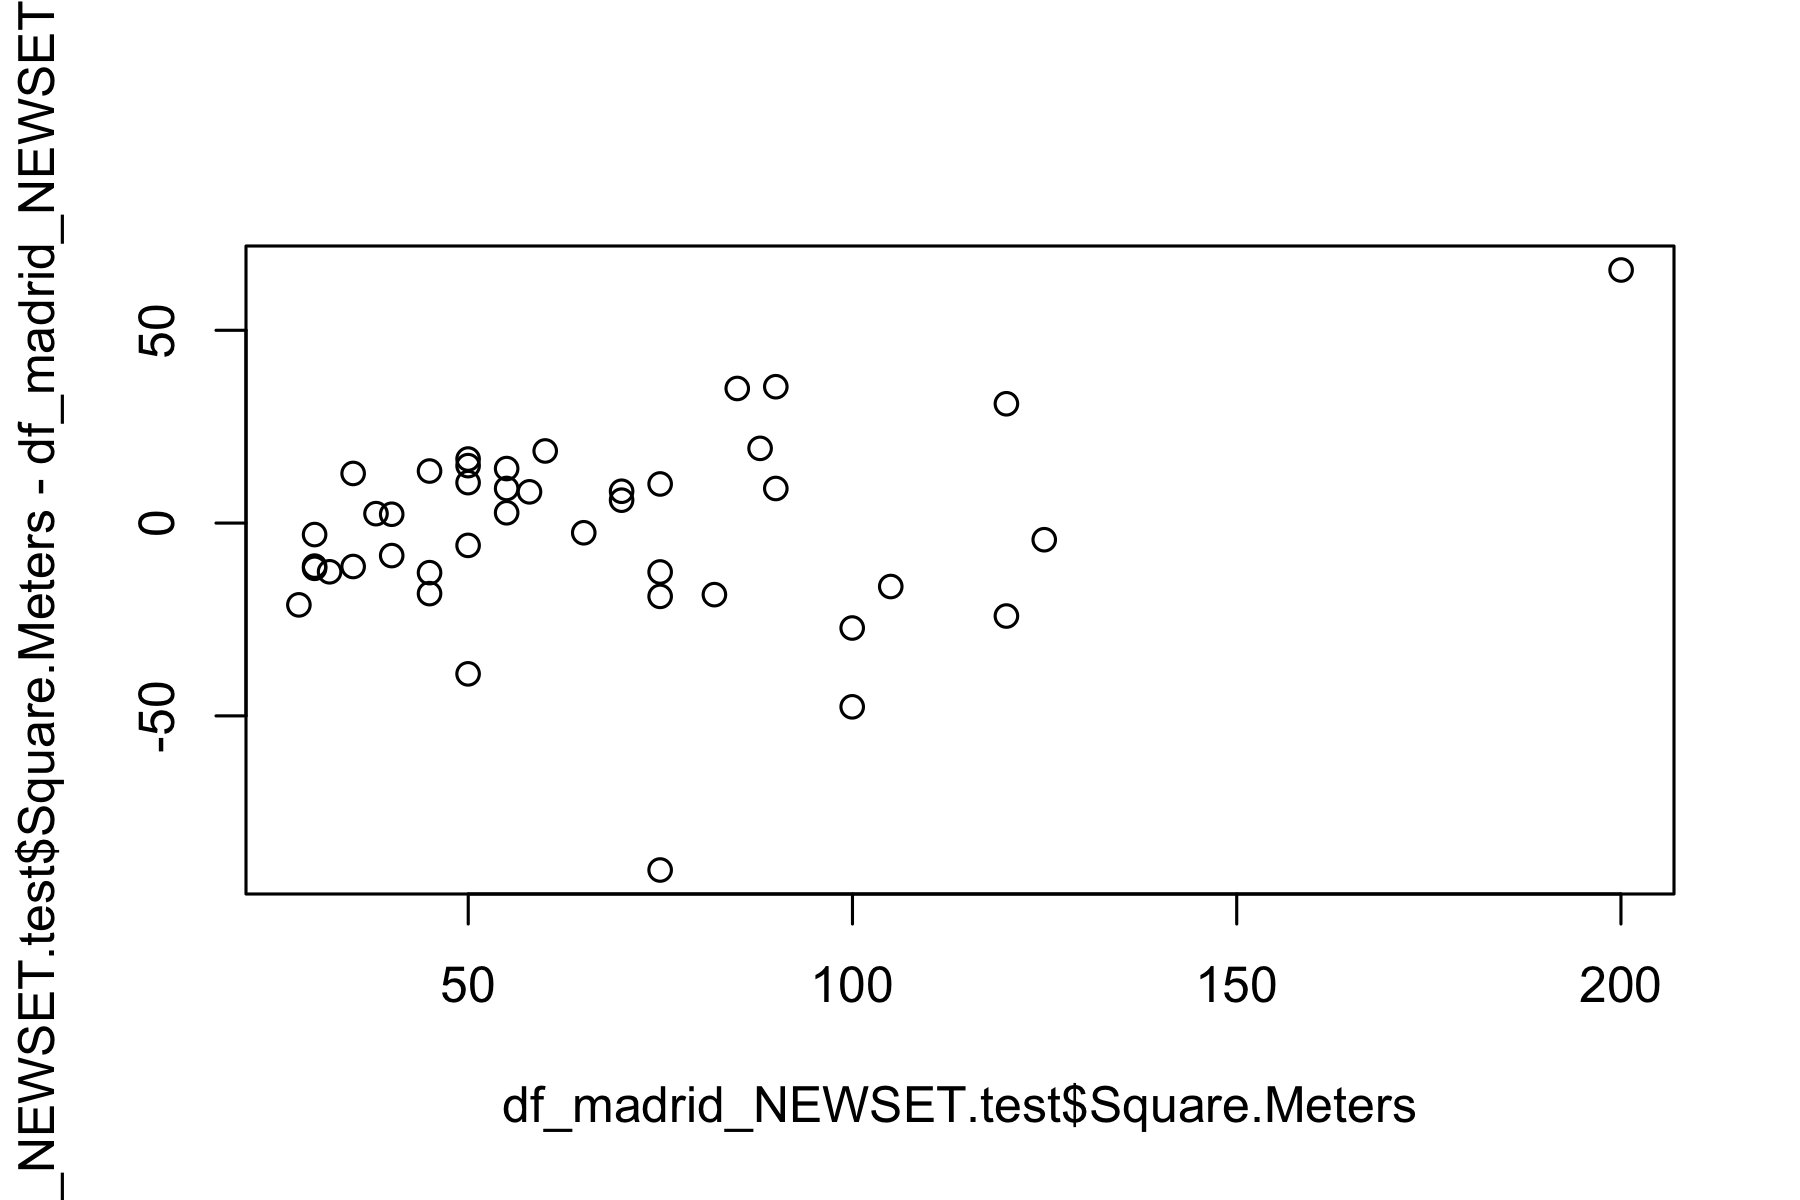

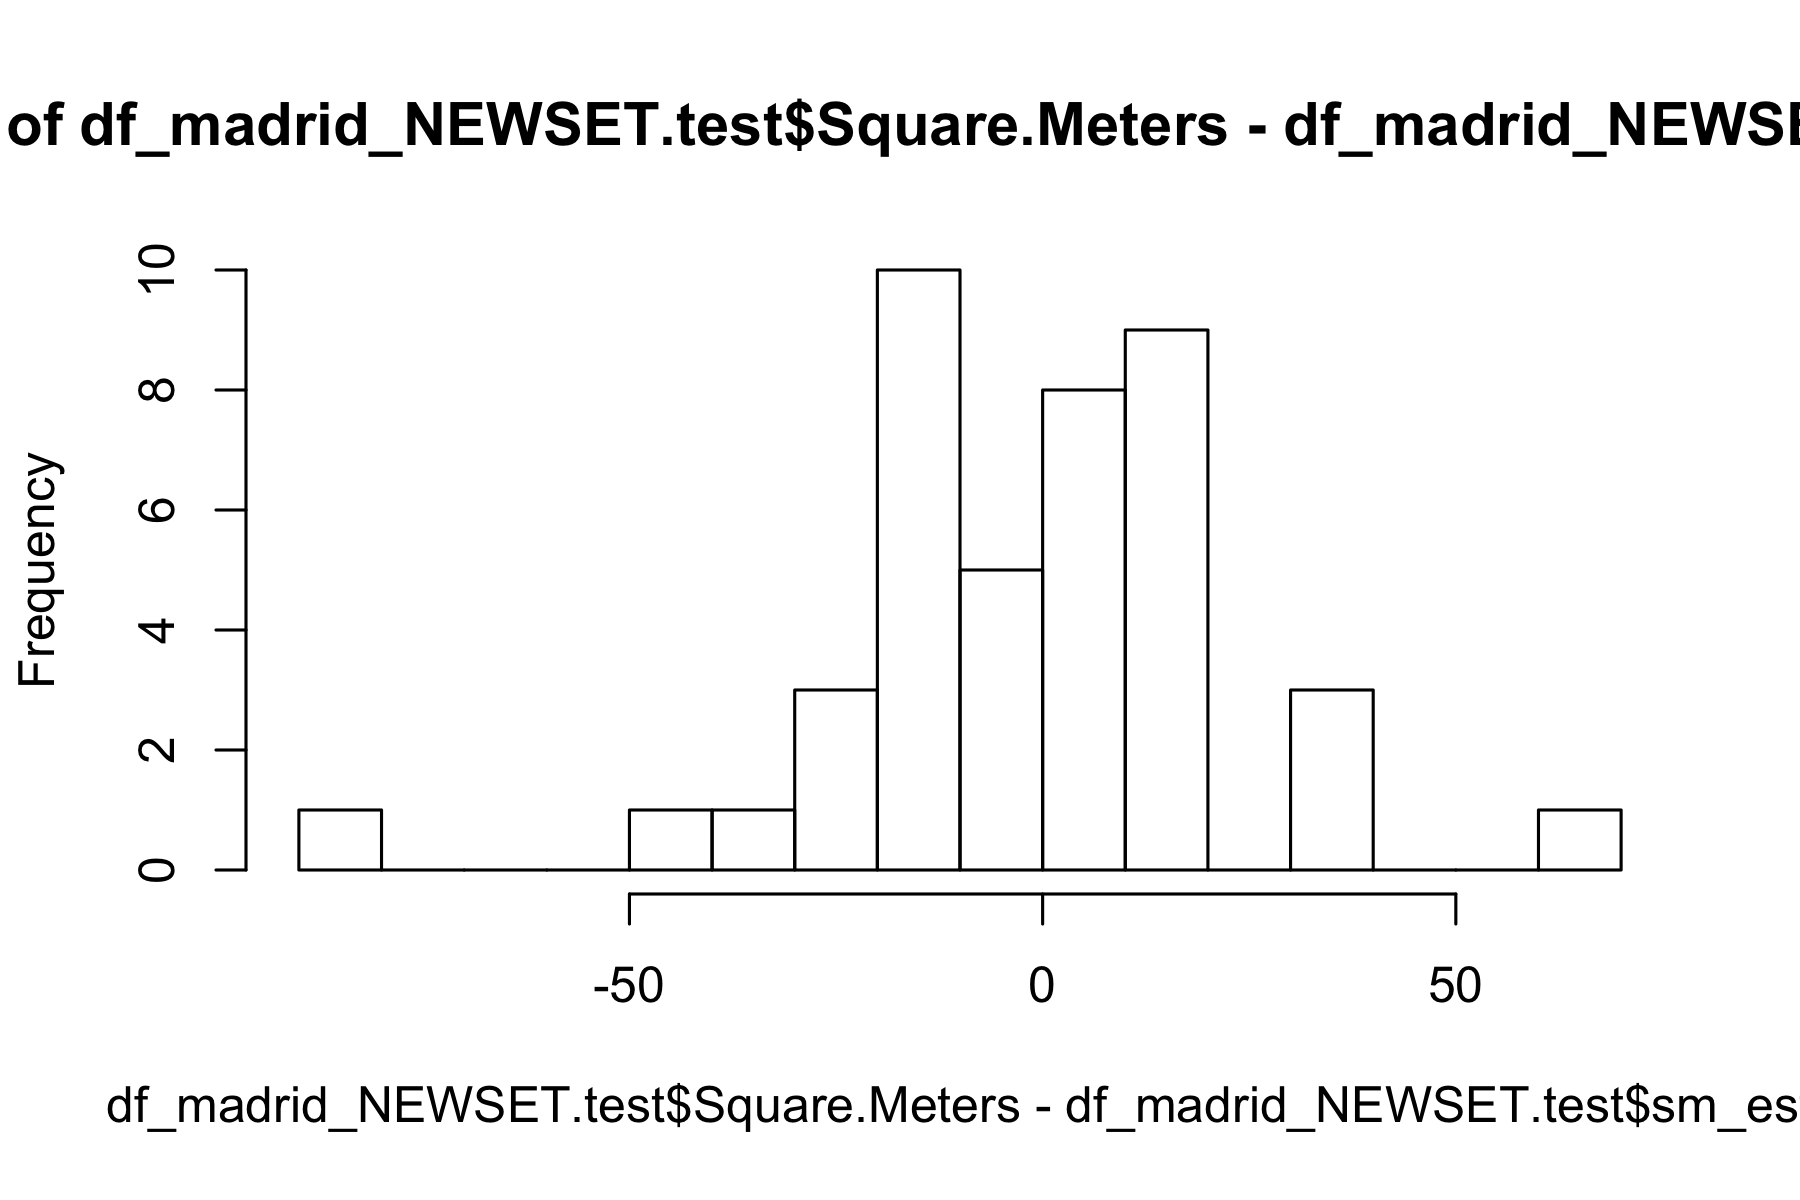

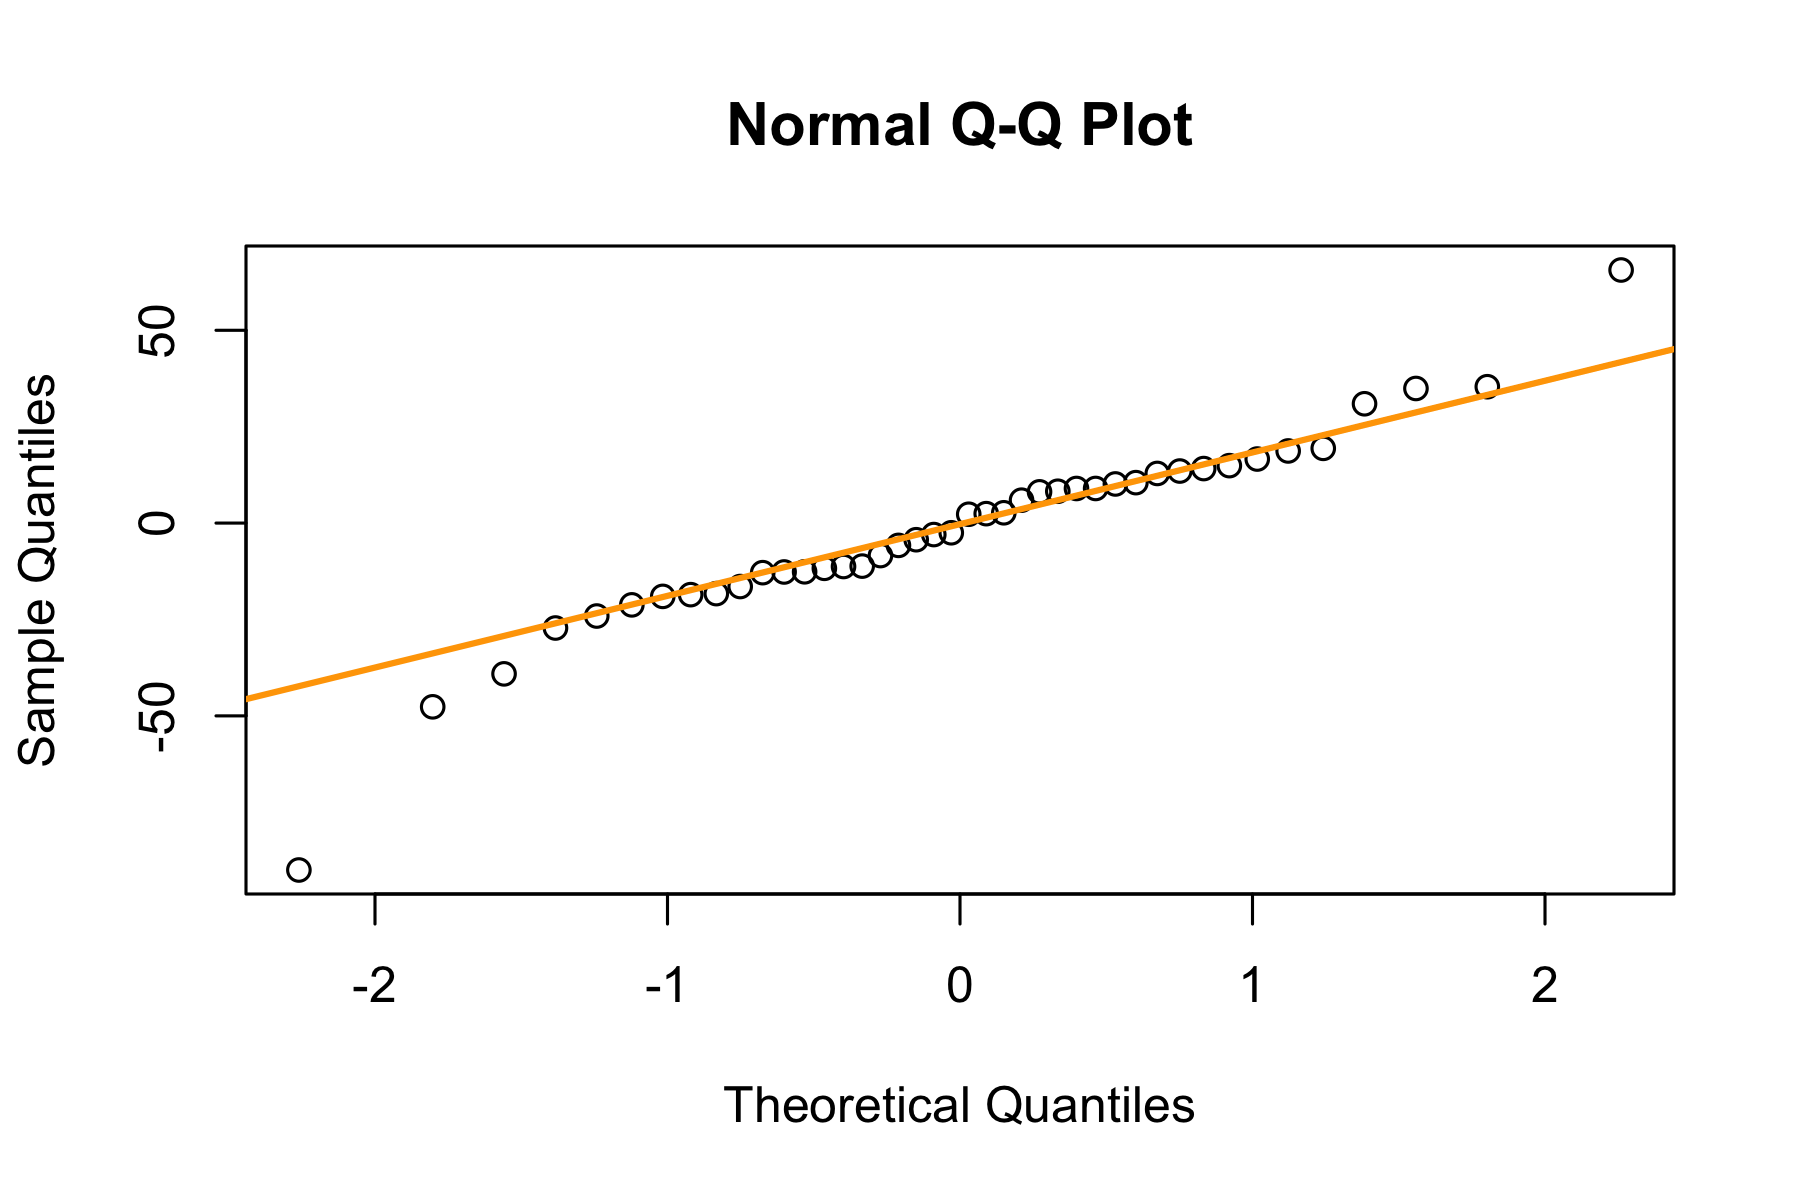

In [38]:
df_madrid_NEWSET.test$sm_est<-predict(model_df_madrid_NEWSET,df_madrid_NEWSET.test)
plot(df_madrid_NEWSET.test$Square.Meters,(df_madrid_NEWSET.test$Square.Meters-df_madrid_NEWSET.test$sm_est))

caret::postResample(pred=df_madrid_NEWSET.test$sm_est, obs= df_madrid_NEWSET.test$Square.Meters)

hist(df_madrid_NEWSET.test$Square.Meters-df_madrid_NEWSET.test$sm_est,20)
qqnorm(df_madrid_NEWSET.test$Square.Meters-df_madrid_NEWSET.test$sm_est)
qqline(df_madrid_NEWSET.test$Square.Meters-df_madrid_NEWSET.test$sm_est, col = 'orange', lwd =2)

Si tuvieramos un anuncio de un apartamento para 6 personas (Accommodates) con un precio de 80€/noche y 3 habitaciones en el barrio de Sol.
¿Cuantos metros cuadrados tendría?
¿Como varía sus metros cuadrados con cada habitación adicional?

In [39]:
summary(df_madrid.NEW)

     Neighbourhood   Accommodates      Bathrooms        Bedrooms     
 Malasaña   : 654   Min.   : 1.000   Min.   :0.000   Min.   : 0.000  
 Embajadores: 565   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.000  
 La Latina  : 550   Median : 4.000   Median :1.000   Median : 1.000  
 Sol        : 509   Mean   : 4.084   Mean   :1.246   Mean   : 1.422  
 Cortes     : 422   3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.000  
 Justicia   : 375   Max.   :16.000   Max.   :6.000   Max.   :10.000  
 (Other)    :1718                    NA's   :12      NA's   :6       
      Beds            Price         Square.Feet     Guests.Included 
 Min.   : 1.000   Min.   : 18.00   Min.   : 237.0   Min.   : 1.000  
 1st Qu.: 1.000   1st Qu.: 58.00   1st Qu.: 484.0   1st Qu.: 1.000  
 Median : 2.000   Median : 75.00   Median : 646.0   Median : 2.000  
 Mean   : 2.364   Mean   : 90.57   Mean   : 763.2   Mean   : 1.946  
 3rd Qu.: 3.000   3rd Qu.:100.00   3rd Qu.: 861.0   3rd Qu.: 2.000  
 Max.   :16.000   Max.   :

In [40]:
model_df_madrid.Gaus<-glm(df_madrid.NEW,formula="Square.Meters~Neighbourhood*Accommodates+Price+Bedrooms", family=gaussian)
summary(model_df_madrid.Gaus)


Call:
glm(formula = "Square.Meters~Neighbourhood*Accommodates+Price+Bedrooms", 
    family = gaussian, data = df_madrid.NEW)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-49.069   -7.352    0.000    4.895   90.070  

Coefficients: (15 not defined because of singularities)
                                             Estimate Std. Error t value
(Intercept)                                 -20.04012   37.73904  -0.531
NeighbourhoodAdelfas                        -43.05528   28.53517  -1.509
NeighbourhoodAlmagro                        -15.86416   22.25203  -0.713
NeighbourhoodAlmenara                        19.34588   57.54292   0.336
NeighbourhoodArapiles                      -140.39640   79.03970  -1.776
NeighbourhoodArgüelles                      159.54327  109.53363   1.457
NeighbourhoodBarajas                          5.80258   28.81799   0.201
NeighbourhoodCarabanchel                     59.55404   49.28284   1.208
NeighbourhoodCastellana                      9

In [41]:
Sol_Madrid_Square.Meters3 <- 23.11505+6*4.67747+80*0.08191+3*18.01197-7.56089
paste("Según nuestro modelo, un apartamento para seis personas, a 80 euros/día y tres habitaciones, en el barrio de Sol, tendría ",round(Sol_Madrid_Square.Meters3,2),"m^2")

[1] "Según nuestro modelo, un apartamento para seis personas, a 80 euros/día y tres habitaciones, en el barrio de Sol, tendría  104.21 m^2"

In [42]:
Sol_Madrid_Square.Meters4 <- 23.11505+6*4.67747+80*0.08191+4*18.01197-7.56089
Sol_Madrid_Square.Meters_Adicional <- Sol_Madrid_Square.Meters4-Sol_Madrid_Square.Meters3
paste("Según nuestro modelo, con cada habitación adicional en el barrio de Sol, el alojamiento tendría unos ", round(Sol_Madrid_Square.Meters_Adicional,2),"m^2 adicionales")

[1] "Según nuestro modelo, con cada habitación adicional en el barrio de Sol, el alojamiento tendría unos  18.01 m^2 adicionales"

Rellenar los Square.Meters con valor NA con el estimado con el modelo anterior.

In [43]:
model_df_madrid.Gaus.NEW<-glm(df_madrid.NEW,formula="Square.Meters~Bedrooms+Price", family=gaussian)
summary(model_df_madrid.Gaus.NEW)


Call:
glm(formula = "Square.Meters~Bedrooms+Price", family = gaussian, 
    data = df_madrid.NEW)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-70.157  -13.146   -4.109    9.834  281.636  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 14.28109    4.55820   3.133 0.002040 ** 
Bedrooms    26.46309    2.73580   9.673  < 2e-16 ***
Price        0.14191    0.03597   3.946 0.000116 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 960.2237)

    Null deviance: 362769  on 171  degrees of freedom
Residual deviance: 162278  on 169  degrees of freedom
  (4621 observations deleted due to missingness)
AIC: 1674.2

Number of Fisher Scoring iterations: 2


In [44]:
str(predict(model_df_madrid.Gaus.NEW,df_madrid.NEW))

 Named num [1:4793] 76.4 81.4 77.9 84.2 18.5 ...
 - attr(*, "names")= chr [1:4793] "1" "2" "3" "4" ...


In [45]:
library(zoo)
df_madrid.NEW$Square.Meters=na.aggregate(df_madrid.NEW$Square.Meters,predict(model_df_madrid.Gaus.NEW,df_madrid.NEW))


Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



In [46]:
head(df_madrid.NEW)
summary(df_madrid.NEW)

Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id
Acacias,4,2.0,2,2,65,NA,1,0,88,40.40125,-3.702125,65.03210,1
Acacias,4,1.0,2,3,100,NA,1,0,NA,40.40540,-3.711909,66.67339,1
Acacias,2,1.0,2,1,75,NA,1,0,NA,40.40270,-3.703143,69.95596,1
Acacias,5,2.0,2,2,120,NA,4,20,95,40.40519,-3.706163,90.02301,1
Acacias,2,0.5,0,2,30,NA,2,0,81,40.40351,-3.703586,NaN,1
Acacias,2,1.0,1,1,68,NA,1,0,94,40.40452,-3.707737,74.97272,1


     Neighbourhood   Accommodates      Bathrooms        Bedrooms     
 Malasaña   : 654   Min.   : 1.000   Min.   :0.000   Min.   : 0.000  
 Embajadores: 565   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.000  
 La Latina  : 550   Median : 4.000   Median :1.000   Median : 1.000  
 Sol        : 509   Mean   : 4.084   Mean   :1.246   Mean   : 1.422  
 Cortes     : 422   3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.000  
 Justicia   : 375   Max.   :16.000   Max.   :6.000   Max.   :10.000  
 (Other)    :1718                    NA's   :12      NA's   :6       
      Beds            Price         Square.Feet     Guests.Included 
 Min.   : 1.000   Min.   : 18.00   Min.   : 237.0   Min.   : 1.000  
 1st Qu.: 1.000   1st Qu.: 58.00   1st Qu.: 484.0   1st Qu.: 1.000  
 Median : 2.000   Median : 75.00   Median : 646.0   Median : 2.000  
 Mean   : 2.364   Mean   : 90.57   Mean   : 763.2   Mean   : 1.946  
 3rd Qu.: 3.000   3rd Qu.:100.00   3rd Qu.: 861.0   3rd Qu.: 2.000  
 Max.   :16.000   Max.   :

Usar PCA para encontrar el apartamento más cercano a uno dado.

Este algoritmo nos ayudaría a dado un apartamento que el algoritmo nos devolvería los 5 apartamentos más similares.


Crearemos una función tal que le pasemos un apartamento con los siguientes datos:
* Accommodates	
* Bathrooms	
* Bedrooms	
* Beds	
* Price	
* Guests.Included	
* Extra.People	
* Review.Scores.Rating	
* Latitude	
* Longitude	
* Square.Meters

y nos devuelva los 5 más similares de:

In [54]:
summary(df_madrid.NEW)

     Neighbourhood   Accommodates      Bathrooms        Bedrooms     
 Malasaña   : 654   Min.   : 1.000   Min.   :0.000   Min.   : 0.000  
 Embajadores: 565   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.000  
 La Latina  : 550   Median : 4.000   Median :1.000   Median : 1.000  
 Sol        : 509   Mean   : 4.084   Mean   :1.246   Mean   : 1.422  
 Cortes     : 422   3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.000  
 Justicia   : 375   Max.   :16.000   Max.   :6.000   Max.   :10.000  
 (Other)    :1718                    NA's   :12      NA's   :6       
      Beds            Price         Square.Feet     Guests.Included 
 Min.   : 1.000   Min.   : 18.00   Min.   : 237.0   Min.   : 1.000  
 1st Qu.: 1.000   1st Qu.: 58.00   1st Qu.: 484.0   1st Qu.: 1.000  
 Median : 2.000   Median : 75.00   Median : 646.0   Median : 2.000  
 Mean   : 2.364   Mean   : 90.57   Mean   : 763.2   Mean   : 1.946  
 3rd Qu.: 3.000   3rd Qu.:100.00   3rd Qu.: 861.0   3rd Qu.: 2.000  
 Max.   :16.000   Max.   :

In [109]:
df_madrid.NEW_PCA <- as.matrix(na.omit(df_madrid.NEW[,c('Accommodates','Bathrooms','Bedrooms','Beds','Price','Guests.Included','Extra.People','Review.Scores.Rating','Latitude','Longitude','Square.Meters')]))
summary(df_madrid.NEW_PCA)
dim(df_madrid.NEW_PCA)

  Accommodates    Bathrooms        Bedrooms          Beds       
 Min.   : 1.0   Min.   :1.000   Min.   :0.000   Min.   : 1.000  
 1st Qu.: 3.0   1st Qu.:1.000   1st Qu.:1.000   1st Qu.: 1.000  
 Median : 4.0   Median :1.000   Median :1.000   Median : 2.000  
 Mean   : 3.9   Mean   :1.169   Mean   :1.339   Mean   : 2.185  
 3rd Qu.: 4.0   3rd Qu.:1.000   3rd Qu.:2.000   3rd Qu.: 3.000  
 Max.   :16.0   Max.   :5.000   Max.   :5.000   Max.   :14.000  
     Price       Guests.Included   Extra.People     Review.Scores.Rating
 Min.   : 30.0   Min.   : 1.000   Min.   :  0.000   Min.   : 20.00      
 1st Qu.: 59.0   1st Qu.: 1.000   1st Qu.:  0.000   1st Qu.: 89.00      
 Median : 70.0   Median : 2.000   Median : 10.000   Median : 93.00      
 Mean   : 76.9   Mean   : 1.939   Mean   :  9.387   Mean   : 91.71      
 3rd Qu.: 90.0   3rd Qu.: 2.000   3rd Qu.: 15.000   3rd Qu.: 97.00      
 Max.   :500.0   Max.   :15.000   Max.   :276.000   Max.   :100.00      
    Latitude       Longitude      

[1] 2476   11

In [106]:
#apt_df <- as.matrix(df_madrid.NEW_PCA[11,])

In [111]:
pr_df<-prcomp(df_madrid.NEW_PCA,center = TRUE, scale. = TRUE)
str(pr_df)

List of 5
 $ sdev    : num [1:11] 2.11 1.179 1.038 1.006 0.822 ...
 $ rotation: num [1:11, 1:11] -0.407 -0.335 -0.407 -0.395 -0.366 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:11] "Accommodates" "Bathrooms" "Bedrooms" "Beds" ...
  .. ..$ : chr [1:11] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:11] 3.9 1.17 1.34 2.18 76.9 ...
  ..- attr(*, "names")= chr [1:11] "Accommodates" "Bathrooms" "Bedrooms" "Beds" ...
 $ scale   : Named num [1:11] 1.591 0.398 0.721 1.272 36.092 ...
  ..- attr(*, "names")= chr [1:11] "Accommodates" "Bathrooms" "Bedrooms" "Beds" ...
 $ x       : num [1:2476, 1:11] -0.577 -2.87 1.447 1.747 1.366 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:2476] "1" "4" "6" "7" ...
  .. ..$ : chr [1:11] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


In [112]:
pr_df$sdev[1:10]

[1] 2.1095217 1.1790277 1.0376955 1.0056319 0.8224225 0.7743781 0.7268148
 [8] 0.7004836 0.5957915 0.4930892

In [113]:
pr_df$rotation[sample(1:nrow(pr_df$rotation),11),1:10]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Accommodates,-0.40721030,0.08802784,-0.01731021,0.17878568,-0.19483584,0.271162670,0.11413345,0.200196996,-0.18907250,0.235929985
Review.Scores.Rating,-0.04199209,0.07897037,0.36030925,-0.89183828,-0.14232075,0.179620441,0.03263262,0.101888471,-0.02269796,0.020886944
Bedrooms,-0.40692599,-0.01882784,-0.14055510,-0.04261089,-0.07742506,0.005101252,0.24056287,-0.004828489,0.45591407,-0.731229902
Longitude,-0.04788908,-0.67430468,0.17657306,0.01311650,-0.54186632,-0.434431170,0.09010798,-0.074801748,-0.11534269,0.026141291
Beds,-0.39548118,0.05846067,-0.07143107,0.11256748,-0.25912890,0.288547774,0.28190048,0.261548518,-0.30020421,0.089812369
Guests.Included,-0.30406608,0.11891645,0.38592981,0.19283723,-0.26734842,0.183935072,-0.68484277,-0.273391386,0.20556672,0.001594264
Square.Meters,-0.38414115,-0.06988359,-0.16820868,-0.14539294,0.17531554,-0.122971675,0.22483176,-0.374805829,0.45568005,0.588402515
Bathrooms,-0.33466793,-0.09259276,-0.15003874,-0.12379468,0.26052980,-0.418393441,-0.43487656,0.634022620,0.03823086,0.066402807
Latitude,-0.01706226,-0.69109762,0.13490505,0.04018098,0.43124717,0.550794955,-0.05793853,0.075669371,0.05306700,-0.030379204
Extra.People,-0.14790565,0.14666263,0.76052941,0.23611188,0.35292157,-0.274912510,0.33836644,0.078500086,-0.02575760,-0.027632797


In [114]:
dim(pr_df$x)

[1] 2476   11

In [119]:
transform_df <- predict(pr_df, newdata = df_madrid.NEW_PCA)

In [123]:
t_pic<-matrix(transform_df[1:11],nrow=1)
Apc <- pr_df$x[,1:11]
dist<-rep(NA,nrow(Apc))
for (i in 1:nrow(Apc)){
    dist[i]<-sum((t_pic-Apc[i,])^2)
}

In [131]:
which.min(dist)

[1] 483

In [128]:
df_madrid.NEW_PCA[483,]

Accommodates            Bathrooms             Bedrooms 
            4.000000             2.000000             1.000000 
                Beds                Price      Guests.Included 
            1.000000            46.000000             2.000000 
        Extra.People Review.Scores.Rating             Latitude 
            7.000000            93.000000            40.450210 
           Longitude        Square.Meters 
           -3.699102            56.020509

In [129]:
df_madrid.NEW_PCA[1,]

Accommodates            Bathrooms             Bedrooms 
            4.000000             2.000000             2.000000 
                Beds                Price      Guests.Included 
            2.000000            65.000000             1.000000 
        Extra.People Review.Scores.Rating             Latitude 
            0.000000            88.000000            40.401248 
           Longitude        Square.Meters 
           -3.702125            65.032100

Bonus: ¿de todas las coordenadas PCA cual es la que mejor permite clasificar por id de barrio?

¿Por qué?